<a href="https://colab.research.google.com/github/Patrick-Moe/Unsupervised_Country_data/blob/main/Unsupervised_Machine_Learning_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial views and imports

---



These are the imports, we'll install fuzzy-c means to use alongside K-means and Agglomerative clustering, plotly for advanced plots; and umap to apply UMAP dimension reduction

In [ ]:
import time
time_start = time.time()
!pip install fuzzy-c-means
!pip install plotly
!pip install umap-learn

In [ ]:
#Usual imports with the exception of gridspec
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

#Machine learning imports along with scoring imports
from sklearn.decomposition import PCA
from fcmeans import FCM
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import scipy.cluster.hierarchy as sch
from scipy.stats import zscore
from sklearn.manifold import TSNE
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler


#Advanced graphing imports
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
import plotly.offline as ply
import umap


import warnings
import sys
import os
import zipfile

%matplotlib inline
warnings.filterwarnings('ignore')

In [1]:
os.environ['KAGGLE_USERNAME'] = "patrickmoellenberndt" # username from the json file
os.environ['KAGGLE_KEY'] = " " # key from the json file
!kaggle datasets download -d rohan0301/unsupervised-learning-on-country-data  #name and location of json file

NameError: ignored

In [ ]:
# Specify the path to the downloaded dataset ZIP file
zip_file_path = 'unsupervised-learning-on-country-data.zip'

# Specify the directory where you want to extract the dataset
extracted_dir = 'dataset_extraction'  # Change this to the desired directory

# Create the directory if it doesn't exist
if not os.path.exists(extracted_dir):
    os.makedirs(extracted_dir)

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

print("Dataset extracted successfully.")

# Explicitly set the working directory to the extracted directory
os.chdir(extracted_dir)

# Now you can load the data into a Pandas DataFrame
data_file_path = 'Country-data.csv'
df = pd.read_csv(data_file_path)

# Now you can work with the 'df' DataFrame to analyze the dataset
# For example, you can display the first few rows of the dataset:
print(df.head())
print(df.columns)

Dataset extracted successfully.
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


There are 8 variables. Total_fer is the number of children that would be born to each wonman if the current age/fertility rates remain the same.
Life_expec is average number of years a new born child would live.
Gdpp is the GDP per person

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [ ]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Data Exploration

---



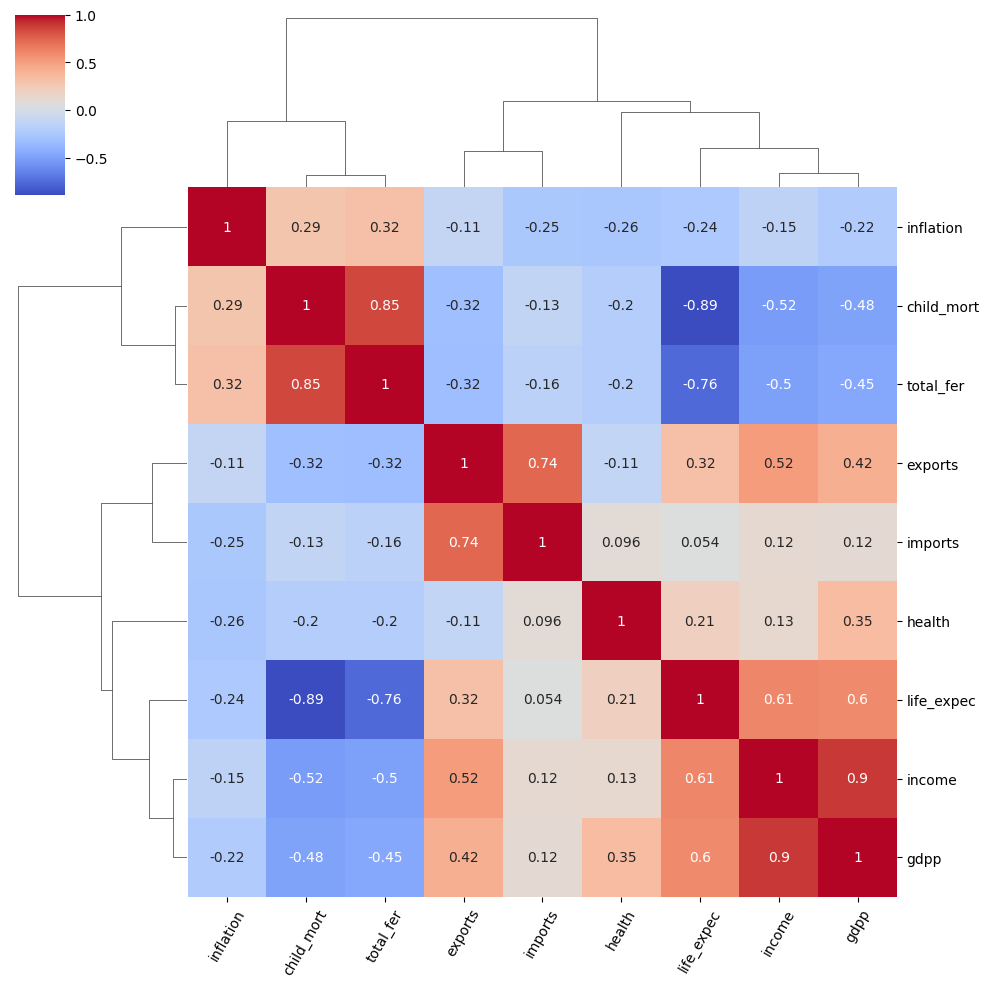

In [ ]:
ax = sns.clustermap(df.corr(),
                   method = 'complete',
                   cmap   = 'coolwarm',
                   annot  = True,
                   annot_kws = {'size': 10})
plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=60);

After here, I get to see the correlation between values. Income and gdpp are highly due to both of them being about money. Child_mort and life_expec are also correlated.

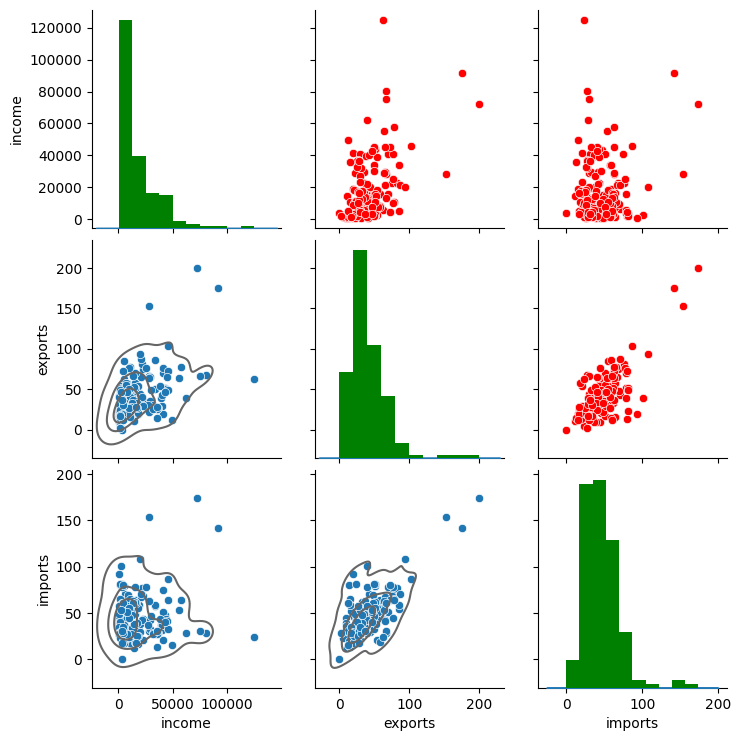

In [ ]:
new_df=pd.DataFrame(df,columns=['income','exports','imports'])
g=sns.pairplot(new_df,diag_kind="kde")
g.map_upper(sns.scatterplot,color='red')
g.map_lower(sns.kdeplot, levels=4, color="0.4")
g.map_diag(plt.hist,color="green")

plt.show()

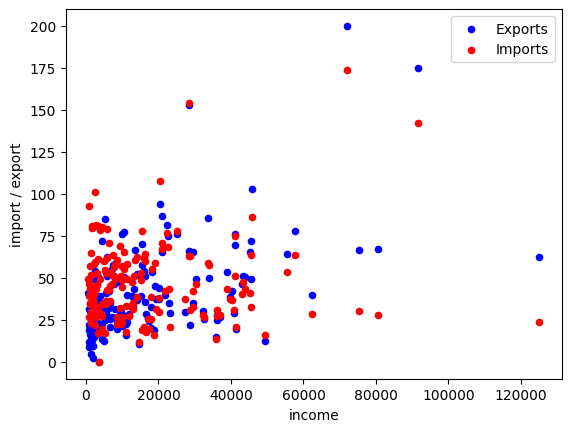

In [ ]:
ax1 = df.plot(kind='scatter', x='income', y='exports', color='b', label = 'Exports')
ax2 = df.plot(kind='scatter', x='income', y='imports', color='r', ax=ax1, label = 'Imports')
plt.ylabel('import / export')
plt.legend()
plt.show()

I can see from the previous graph that exports and imports have a few outliers

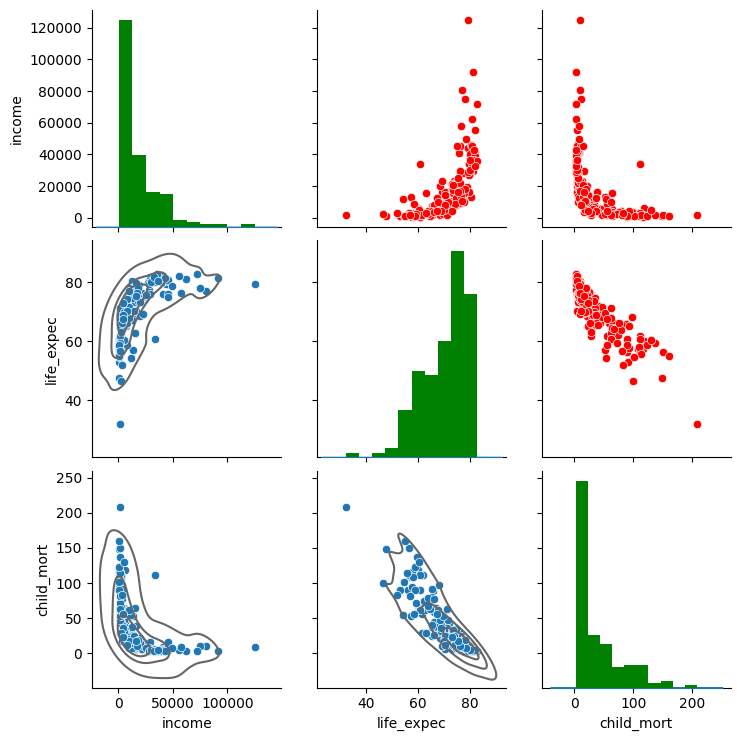

In [ ]:
new_df=pd.DataFrame(df,columns=['income','life_expec','child_mort'])
g=sns.pairplot(new_df,diag_kind="kde")
g.map_upper(sns.scatterplot,color='red')
g.map_lower(sns.kdeplot, levels=4, color="0.4")
g.map_diag(plt.hist,color="green")

plt.show()

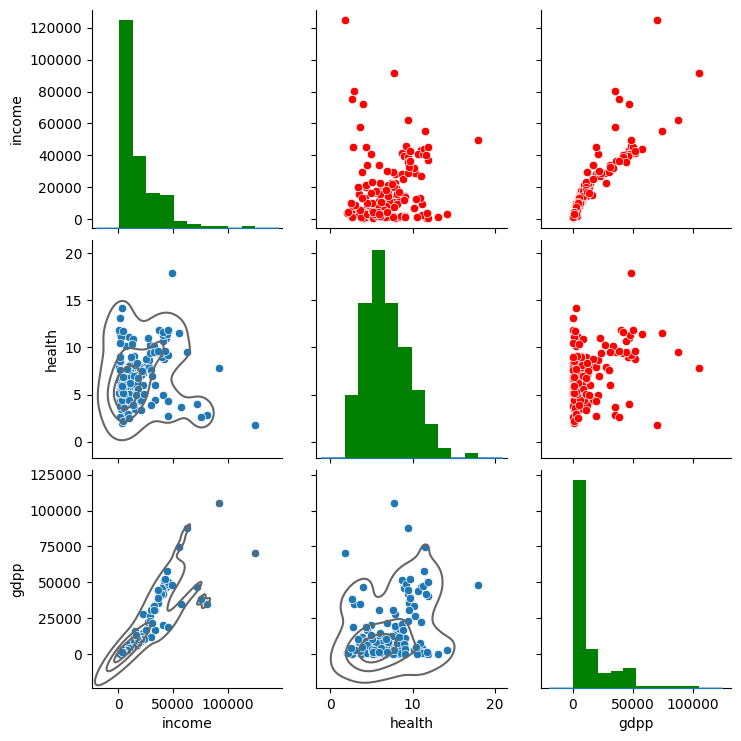

In [ ]:
new_df=pd.DataFrame(df,columns=['income','health','gdpp'])
g=sns.pairplot(new_df,diag_kind="kde")
g.map_upper(sns.scatterplot,color='red')
g.map_lower(sns.kdeplot, levels=4, color="0.4")
g.map_diag(plt.hist,color="green")

plt.show()

In [ ]:
Z_score = zscore(df['income'])
for threshold in range(1, 5):
    print('the score threshold is : {}'.format(threshold))
    outliers_indices = np.where(Z_score > threshold)
    outliers_countries = df['country'].iloc[outliers_indices]

    print("The countries of the outliers:")
    print(outliers_countries)
    print("Number of outliers is: {}".format(len(outliers_countries)))

the score threshold is : 1
The countries of the outliers:
7                 Australia
8                   Austria
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
44                  Denmark
53                  Finland
54                   France
58                  Germany
68                  Iceland
73                  Ireland
82                   Kuwait
91               Luxembourg
110             Netherlands
114                  Norway
115                    Oman
123                   Qatar
128            Saudi Arabia
133               Singapore
144                  Sweden
145             Switzerland
157    United Arab Emirates
159           United States
Name: country, dtype: object
Number of outliers is: 24
the score threshold is : 2
The countries of the outliers:
23                   Brunei
82                   Kuwait
91               Luxembourg
114                  Norway
123                   Qatar
133              

In [ ]:
df_outlier=df[df['income']>90000]
print(df_outlier)

        country  child_mort  exports  health  imports  income  inflation  \
91   Luxembourg         2.8    175.0    7.77    142.0   91700       3.62   
123       Qatar         9.0     62.3    1.81     23.8  125000       6.98   

     life_expec  total_fer    gdpp  
91         81.3       1.63  105000  
123        79.5       2.07   70300  


In [ ]:
df_outlier1=df[df['imports']>125]
print(df_outlier1)

        country  child_mort  exports  health  imports  income  inflation  \
91   Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
98        Malta         6.8    153.0    8.65    154.0   28300      3.830   
133   Singapore         2.8    200.0    3.96    174.0   72100     -0.046   

     life_expec  total_fer    gdpp  
91         81.3       1.63  105000  
98         80.3       1.36   21100  
133        82.7       1.15   46600  


In [ ]:
df_outlier2=df[df['exports']>125]
print(df_outlier2)

        country  child_mort  exports  health  imports  income  inflation  \
91   Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
98        Malta         6.8    153.0    8.65    154.0   28300      3.830   
133   Singapore         2.8    200.0    3.96    174.0   72100     -0.046   

     life_expec  total_fer    gdpp  
91         81.3       1.63  105000  
98         80.3       1.36   21100  
133        82.7       1.15   46600  


In [ ]:
df_outlier3=df[df['life_expec']<40]
print(df_outlier3)

   country  child_mort  exports  health  imports  income  inflation  \
66   Haiti       208.0     15.3    6.91     64.7    1500       5.45   

    life_expec  total_fer  gdpp  
66        32.1       3.33   662  


In [ ]:
df_outlier4=df[df['gdpp']>100000]
print(df_outlier4)

       country  child_mort  exports  health  imports  income  inflation  \
91  Luxembourg         2.8    175.0    7.77    142.0   91700       3.62   

    life_expec  total_fer    gdpp  
91        81.3       1.63  105000  


In [ ]:
df_outlier5=df[df['child_mort']>200]
print(df_outlier5)

   country  child_mort  exports  health  imports  income  inflation  \
66   Haiti       208.0     15.3    6.91     64.7    1500       5.45   

    life_expec  total_fer  gdpp  
66        32.1       3.33   662  


In [ ]:
df1=df.drop(index = [66, 91, 98, 123, 133])

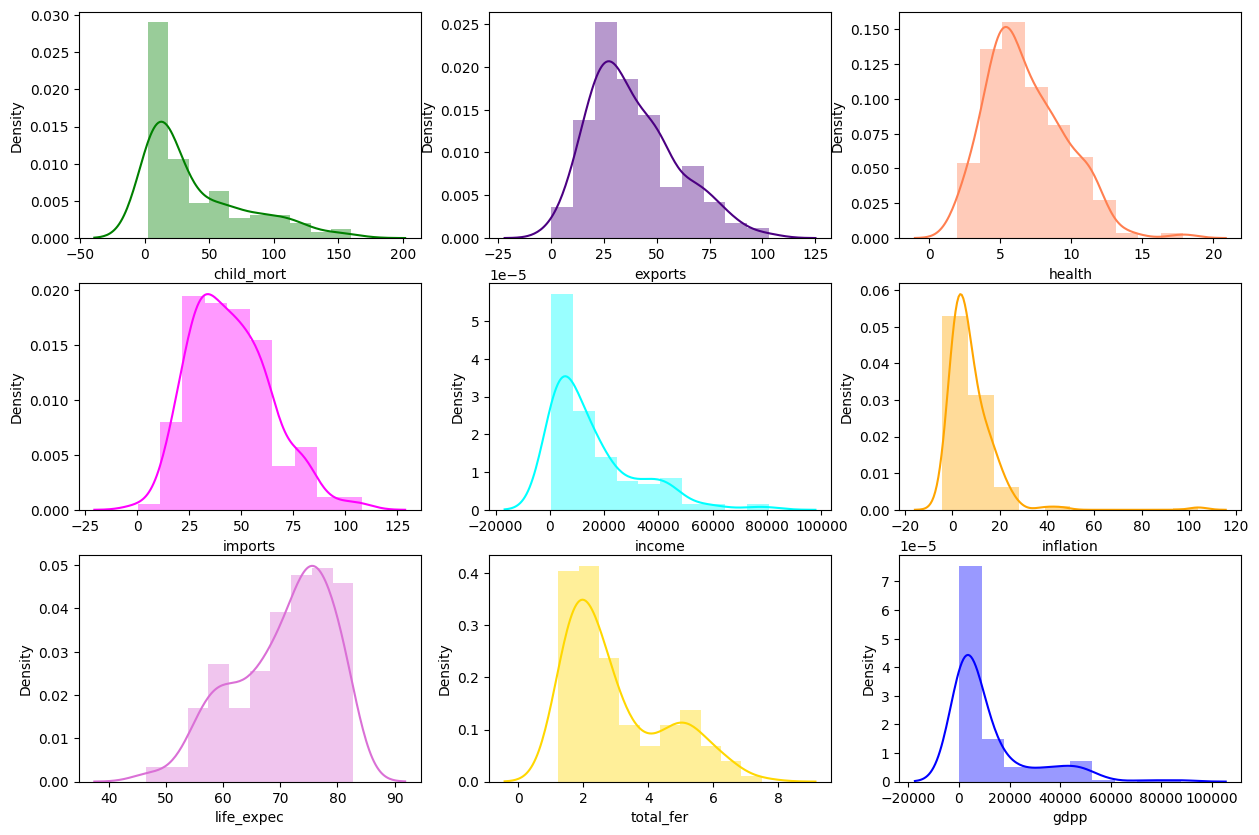

In [ ]:
f, ax = plt.subplots(3,3,figsize=(15,10))
a1 = sns.distplot(df1["child_mort"], bins=10, ax=ax[0][0],color='green')
a2 = sns.distplot(df1["exports"],bins=10, ax=ax[0][1],color='indigo')
a3 = sns.distplot(df1["health"],bins=10, ax=ax[0][2],color="coral")
a4 = sns.distplot(df1["imports"],bins=10, ax=ax[1][0],color="fuchsia")
a5 = sns.distplot(df1["income"],bins=10, ax=ax[1][1],color="cyan")
a6 = sns.distplot(df1["inflation"],bins=10, ax=ax[1][2],color="orange")
a7 = sns.distplot(df1["life_expec"],bins=10, ax=ax[2][0],color="orchid")
a8 = sns.distplot(df1["total_fer"],bins=10, ax=ax[2][1],color="gold")
a9 = sns.distplot(df1["gdpp"],bins=10, ax=ax[2][2],color="blue")

After eliminating the outliers, I can focus on the income as the main feature of our dataset.

In [ ]:
df1_s = df1.sort_values(by='income')
print(df1_s.head())
print(df1_s.tail())

                      country  child_mort  exports  health  imports  income  \
37           Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
88                    Liberia        89.3    19.10   11.80     92.6     700   
26                    Burundi        93.6     8.92   11.60     39.2     764   
112                     Niger       123.0    22.20    5.16     49.1     814   
31   Central African Republic       149.0    11.80    3.98     26.5     888   

     inflation  life_expec  total_fer  gdpp  
37       20.80        57.5       6.54   334  
88        5.47        60.8       5.02   327  
26       12.30        57.7       6.26   231  
112       2.55        58.8       7.49   348  
31        2.01        47.5       5.21   446  
                  country  child_mort  exports  health  imports  income  \
145           Switzerland         4.5     64.0   11.50     53.3   55500   
157  United Arab Emirates         8.6     77.7    3.66     63.6   57600   
114                Norwa

In [ ]:
df1_income=df1_s.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')

Next I set income as the new index, splitting it in half to allow a view of all data sets based off of income. However, because the dataset is large, I split in in half and view the the data from there

In [ ]:
df1_income.describe()['income']['mean']

15707.17901234568

In [ ]:
income_upper = df1_income[df1_income['income'] > 15707.17901]
income_lower = df1_income[df1_income['income']< 15707.17901]

I graph the upper and lower halfs of income to see if there are any visible outliers.

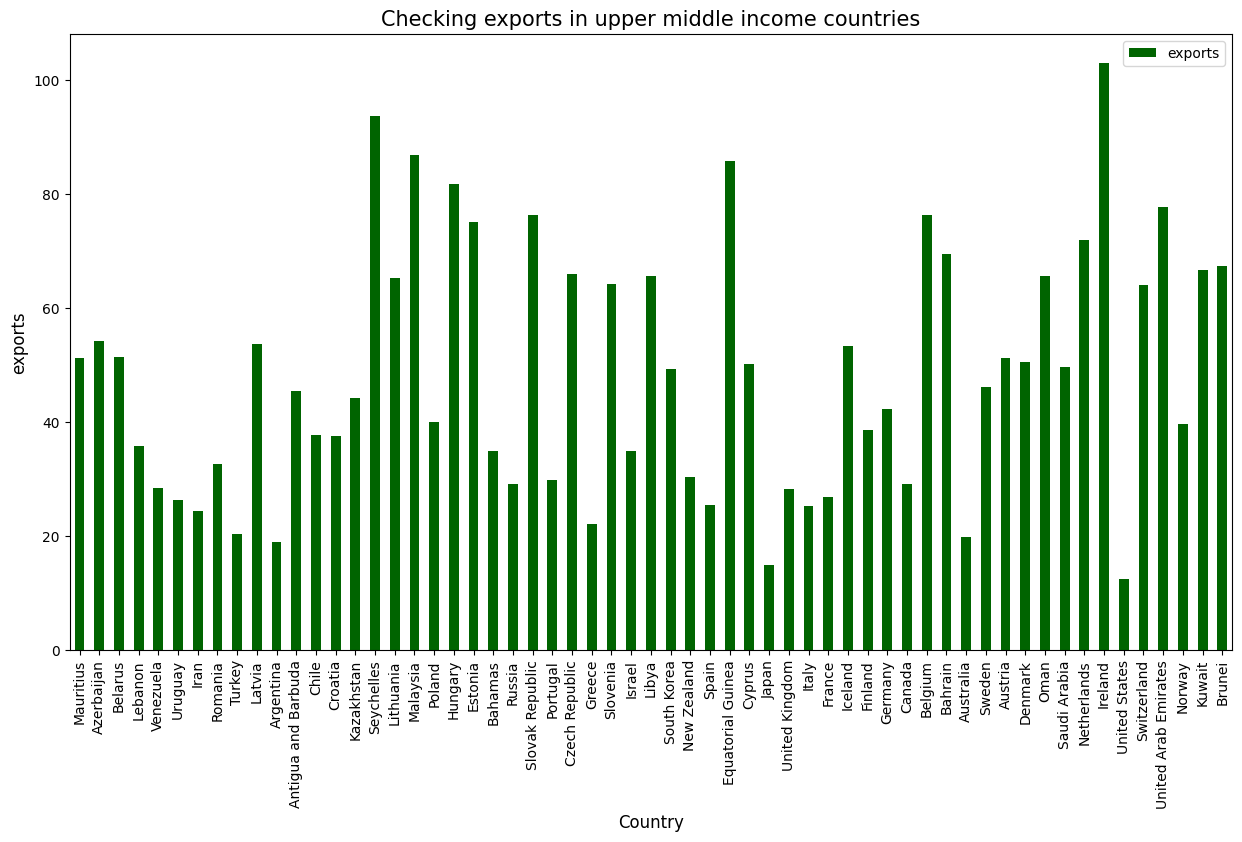

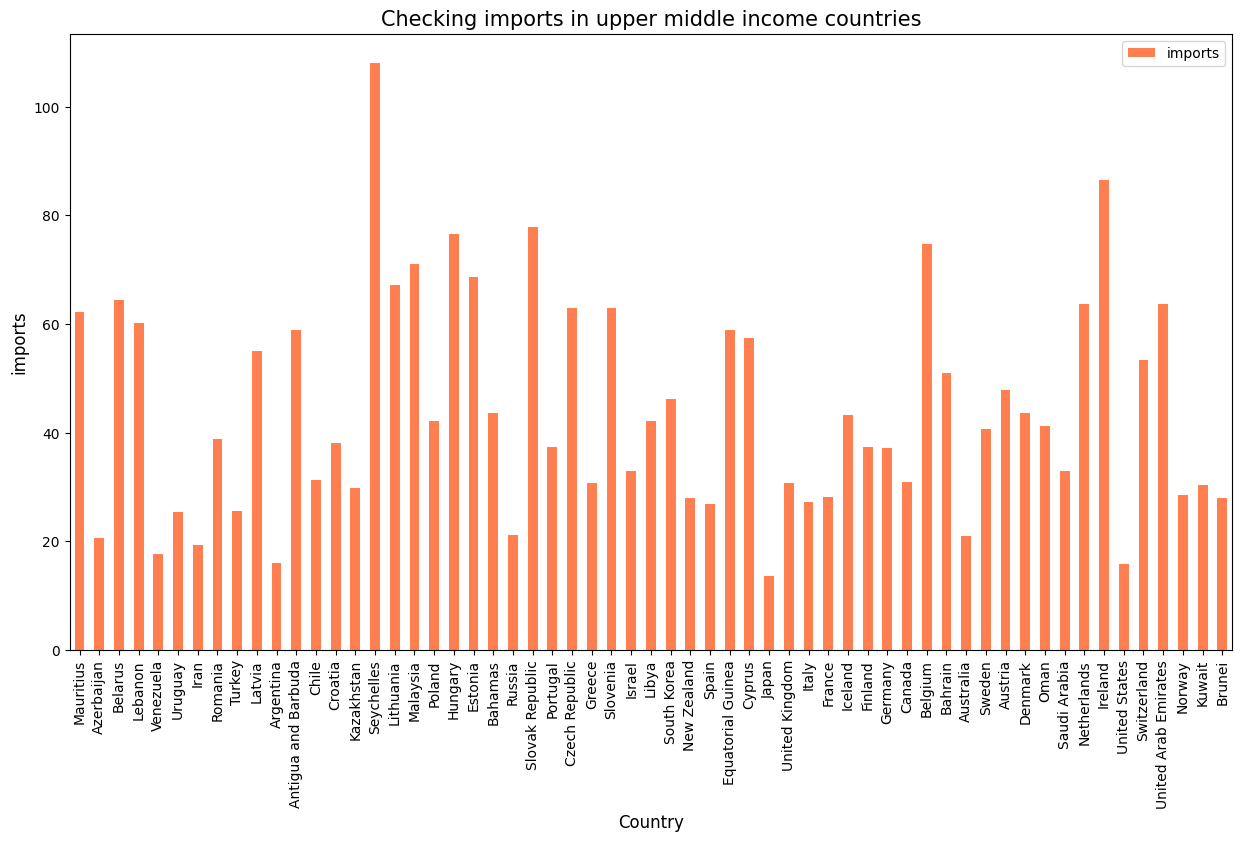

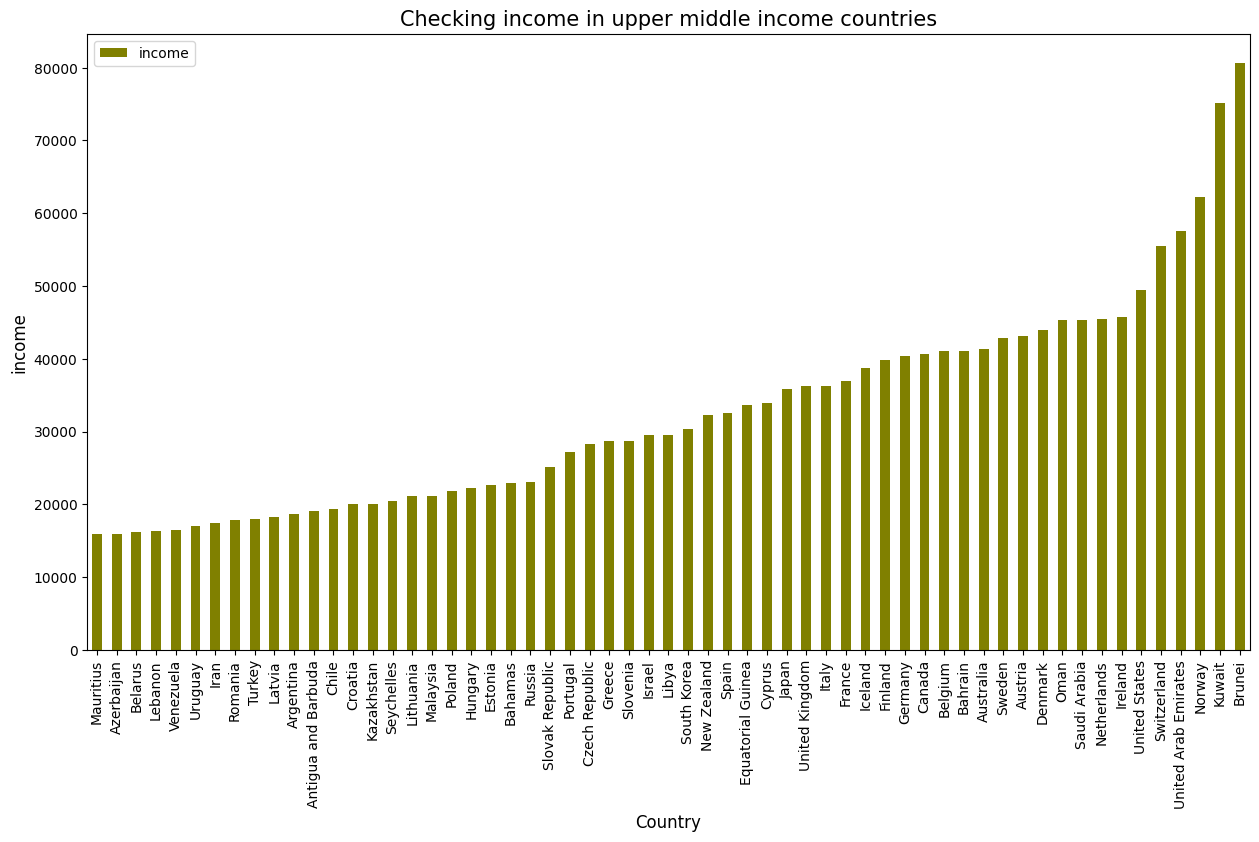

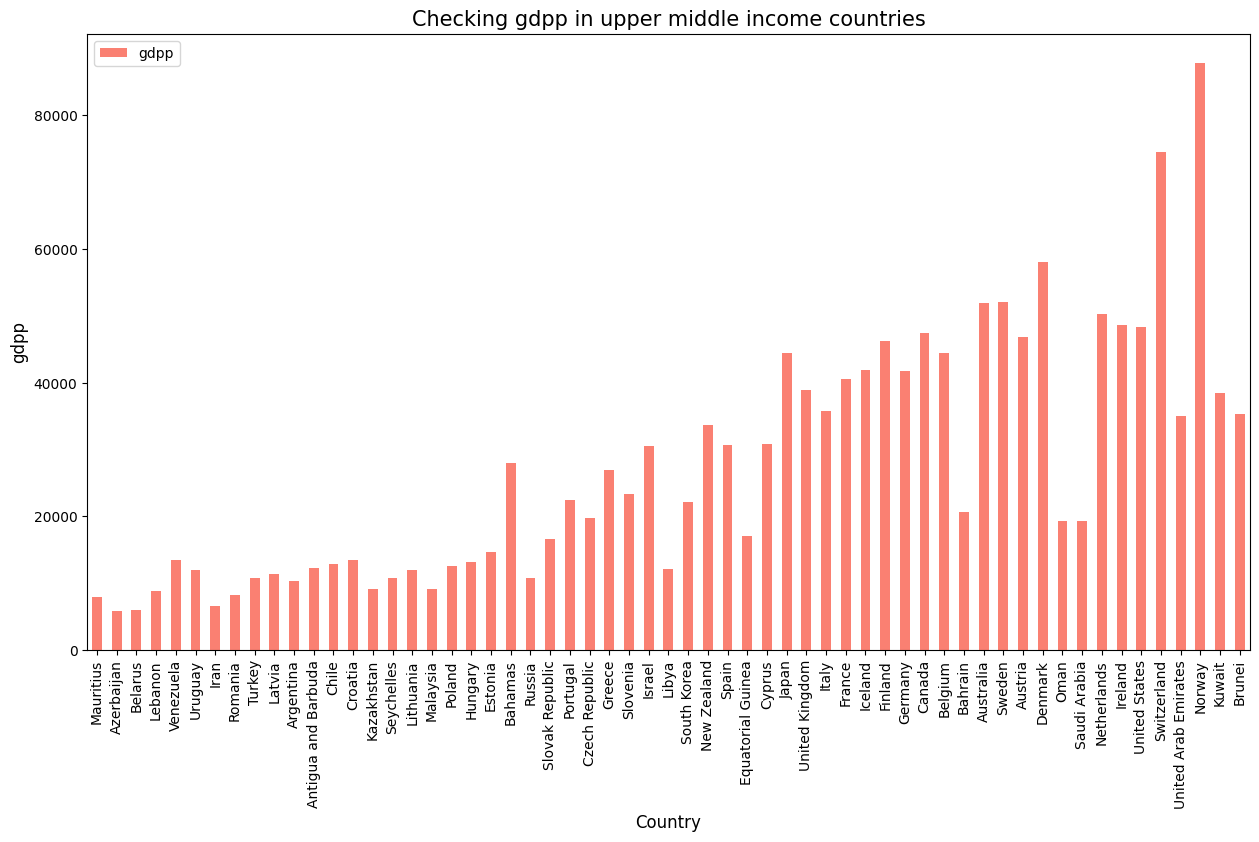

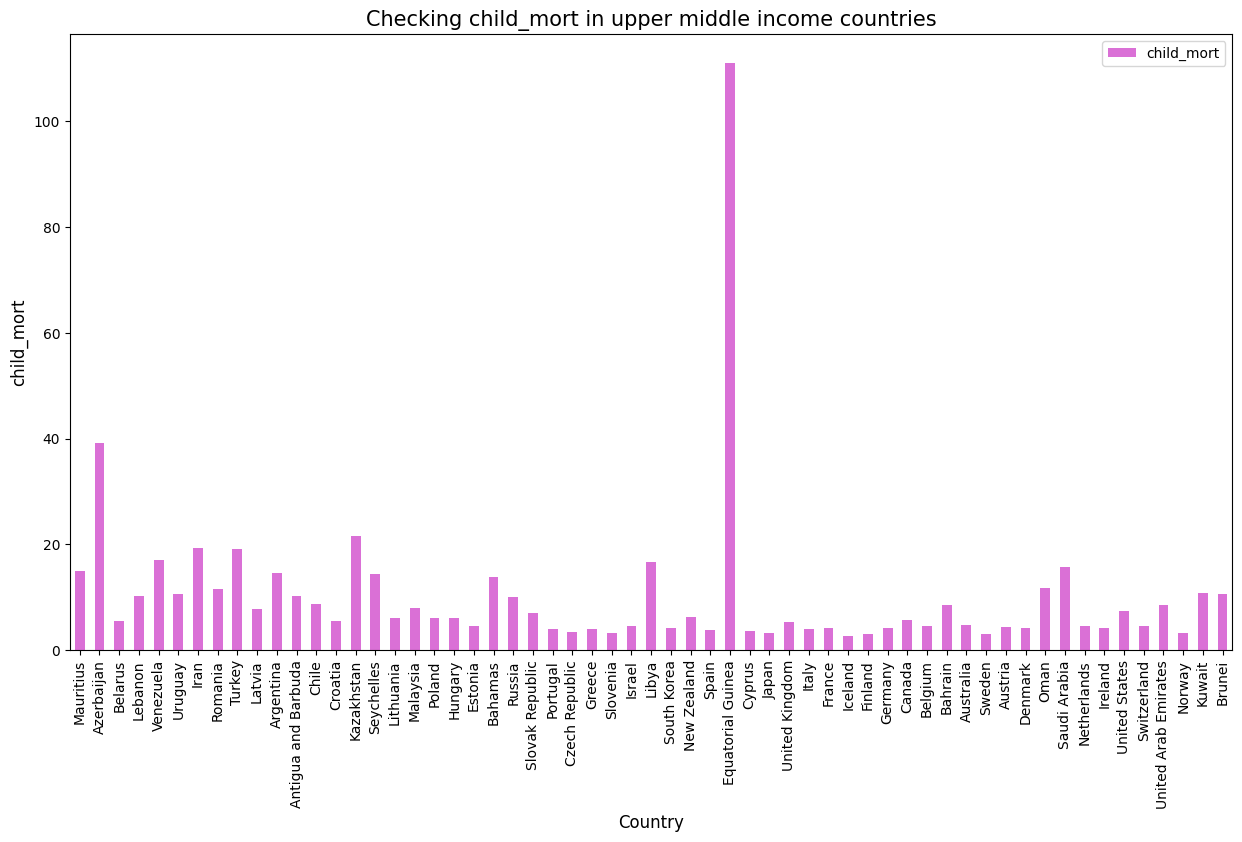

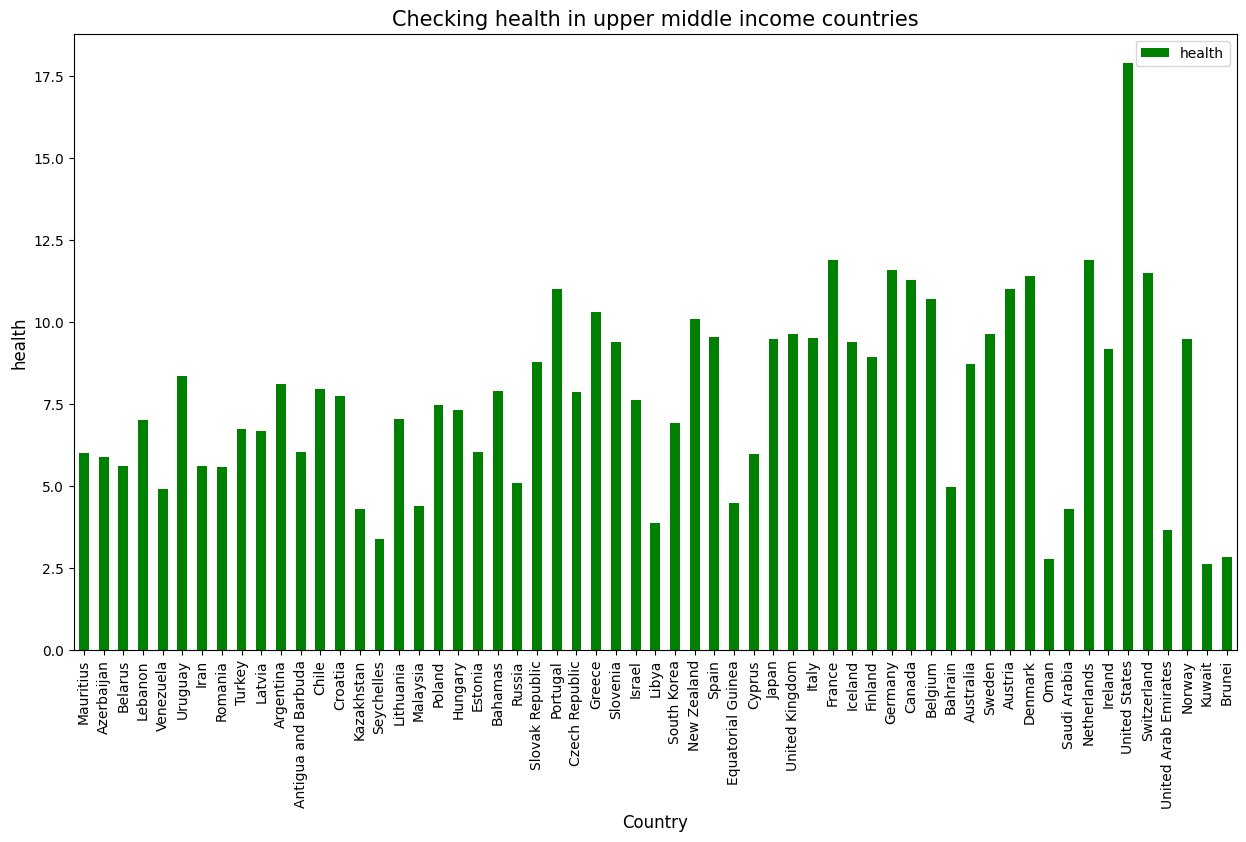

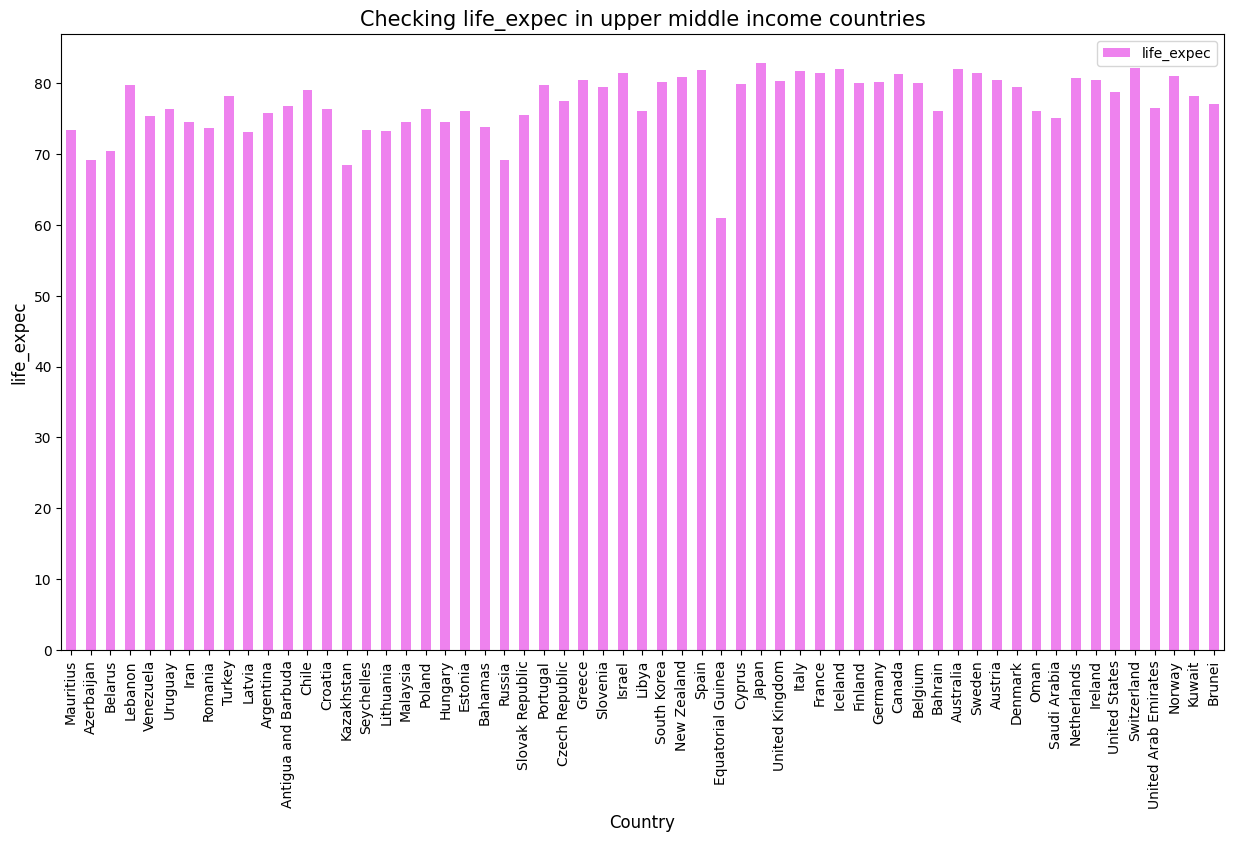

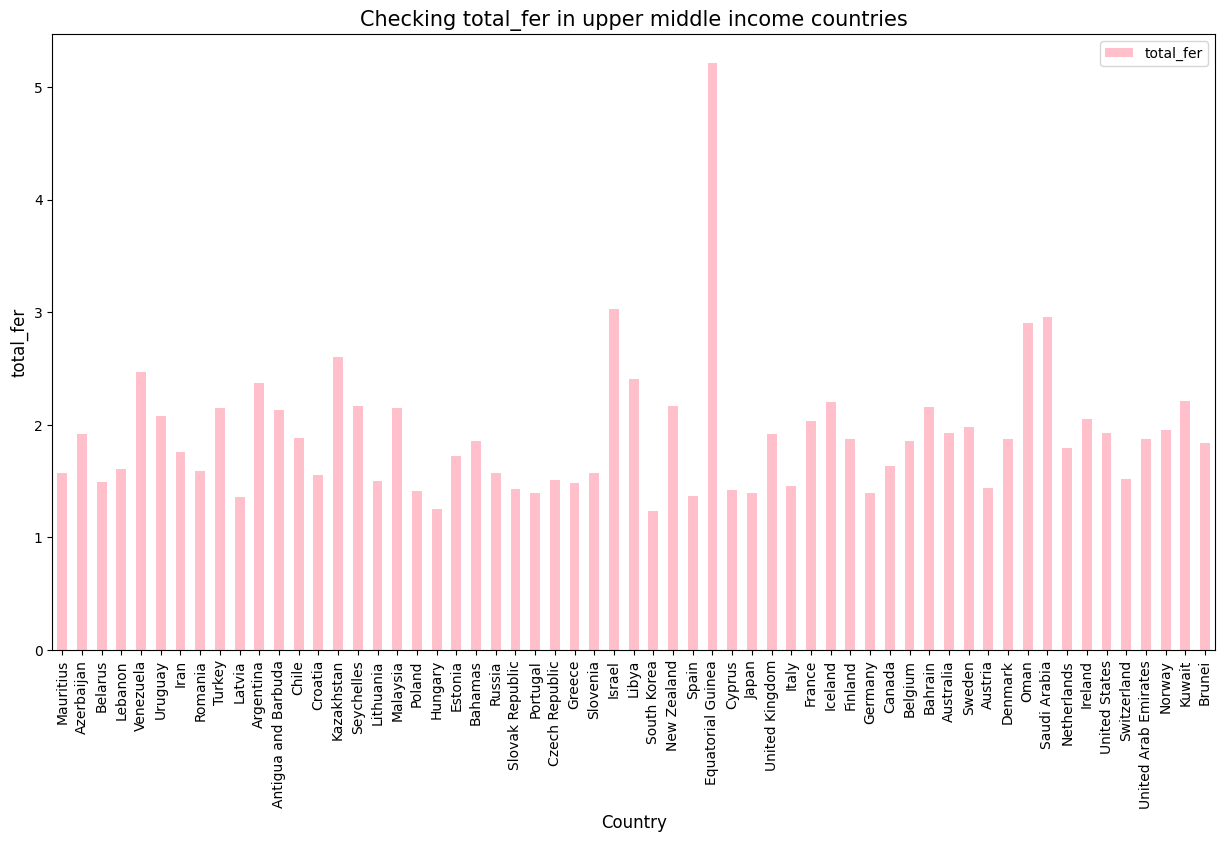

In [ ]:
lst=['exports','imports','income','gdpp','child_mort','health','life_expec','total_fer']
clr=["darkgreen",'coral','olive','salmon','orchid','green','violet','pink']

#nrows=2
ncols=2
i=0
for i in range(0,8):
    income_upper.plot(x="country", y=lst[i], kind="bar", fontsize=10,figsize=(15,8),color=clr[i])
    plt.xticks(rotation=90)
    plt.xlabel("Country",fontsize=12)
    plt.ylabel(lst[i],fontsize=12)
    plt.title("Checking " + lst[i]+ " in upper middle income countries",fontsize=15)

plt.show()

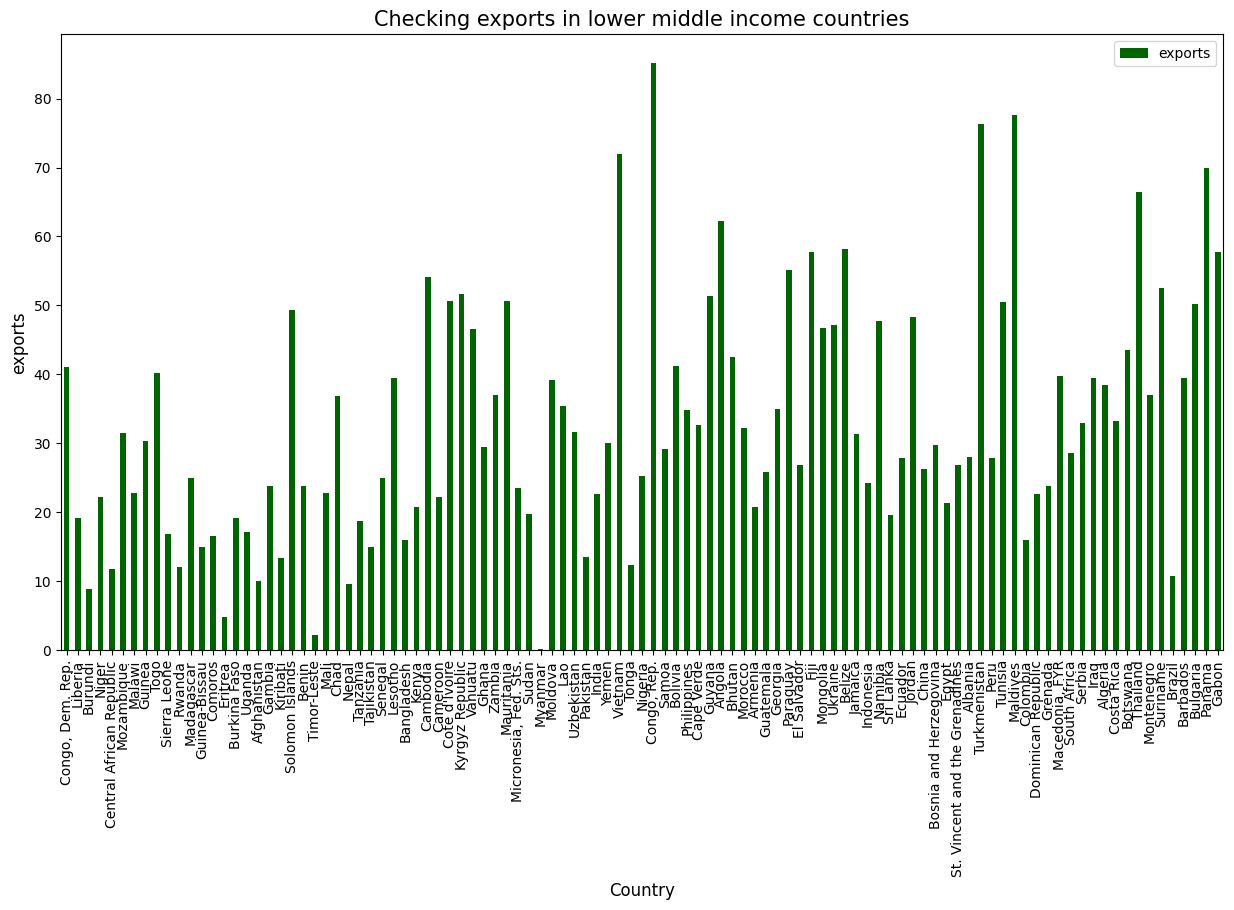

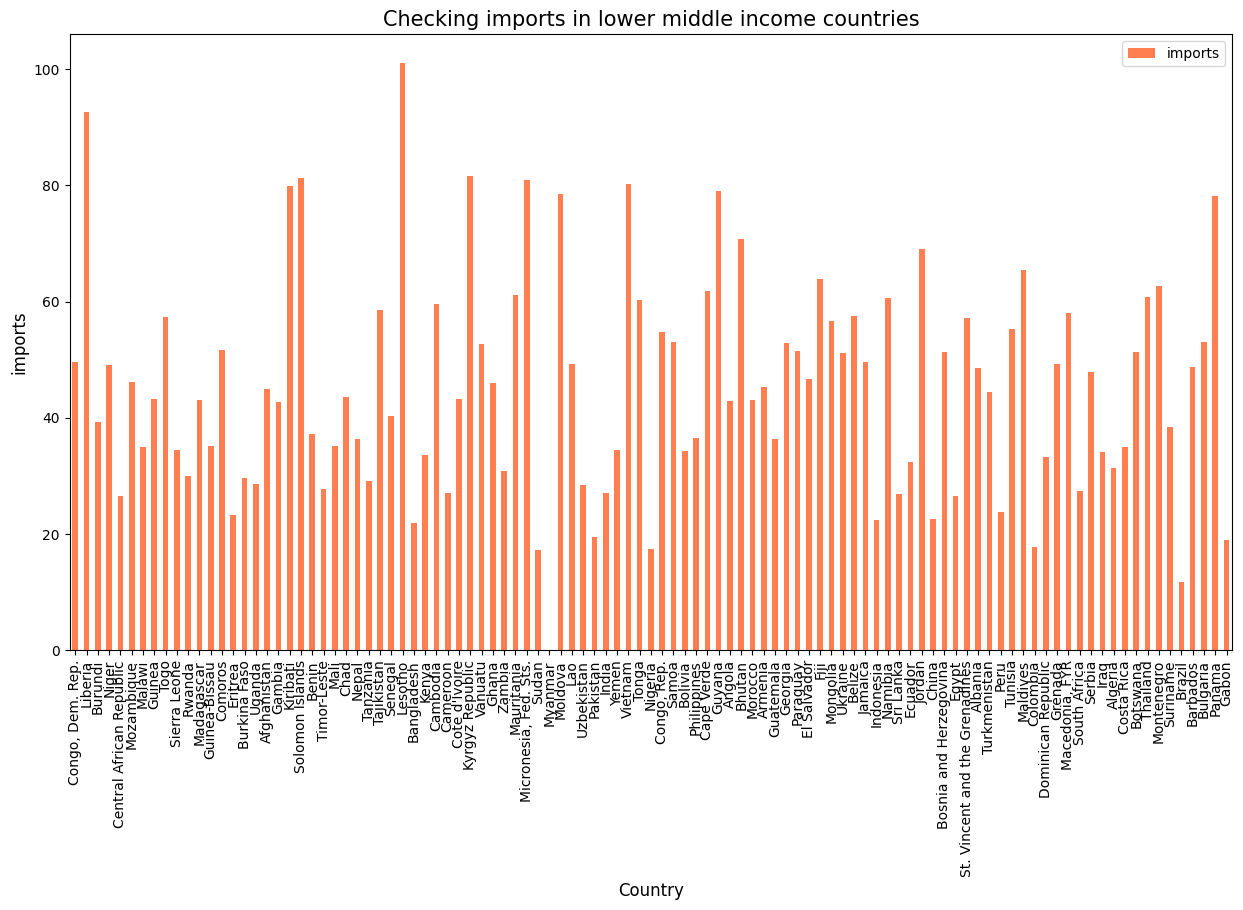

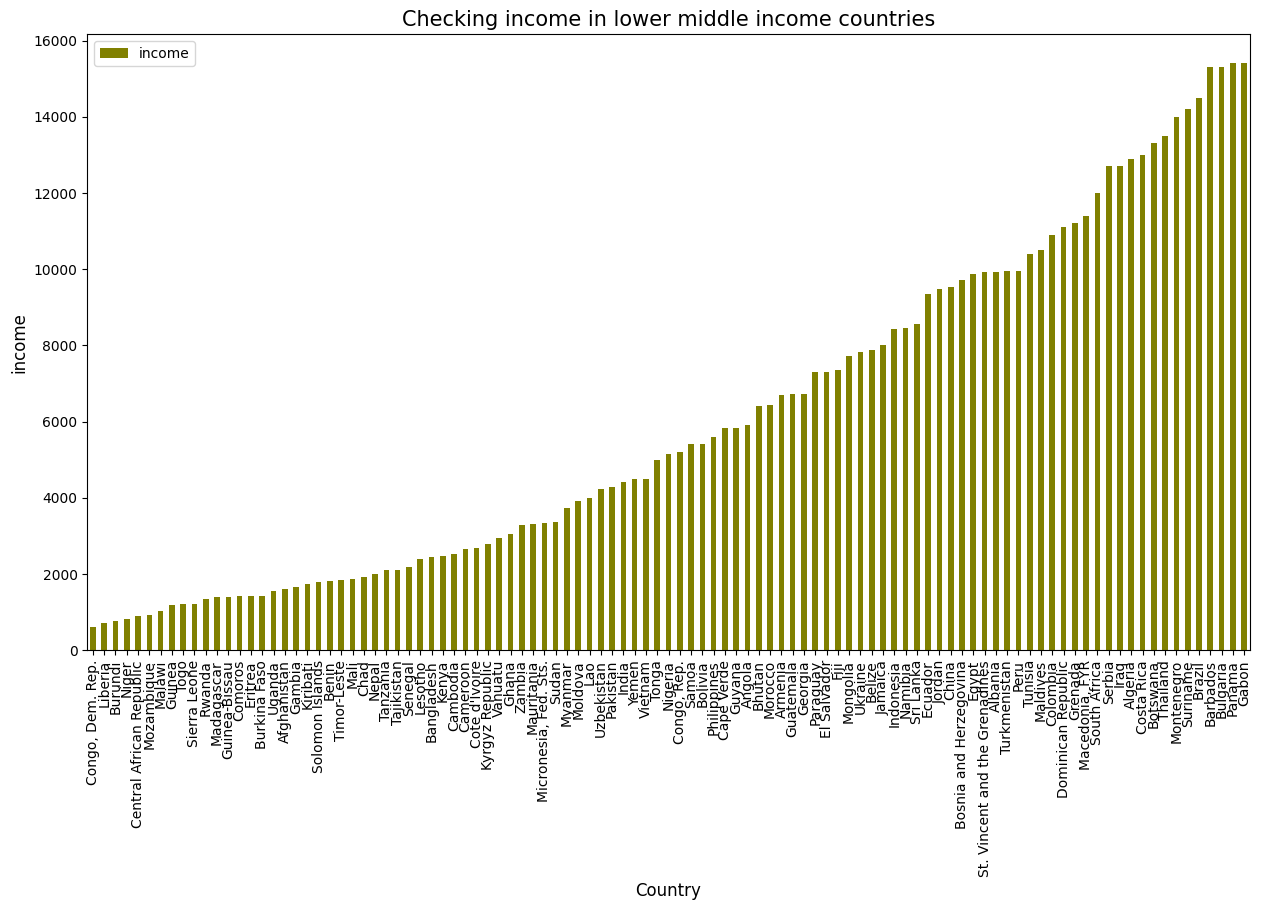

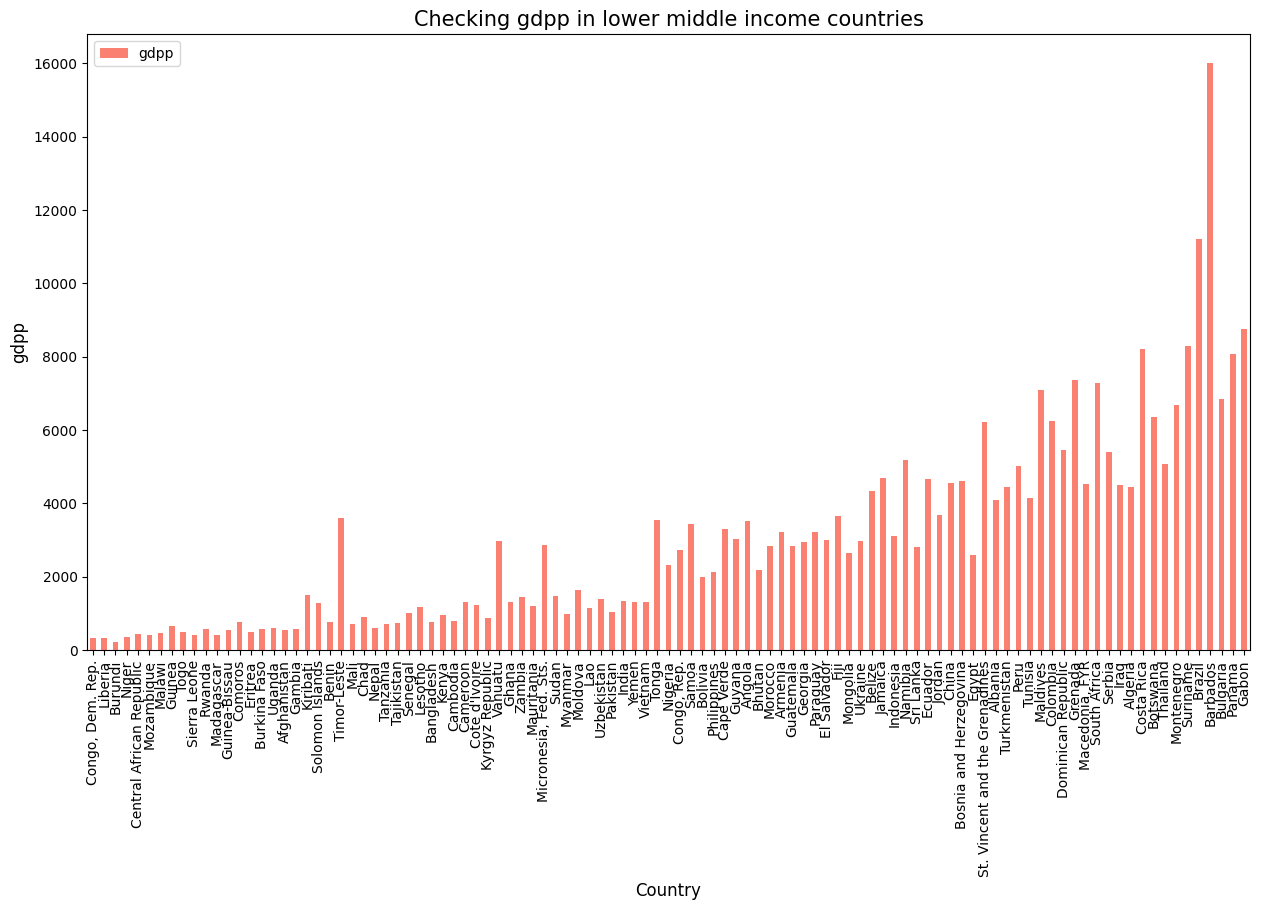

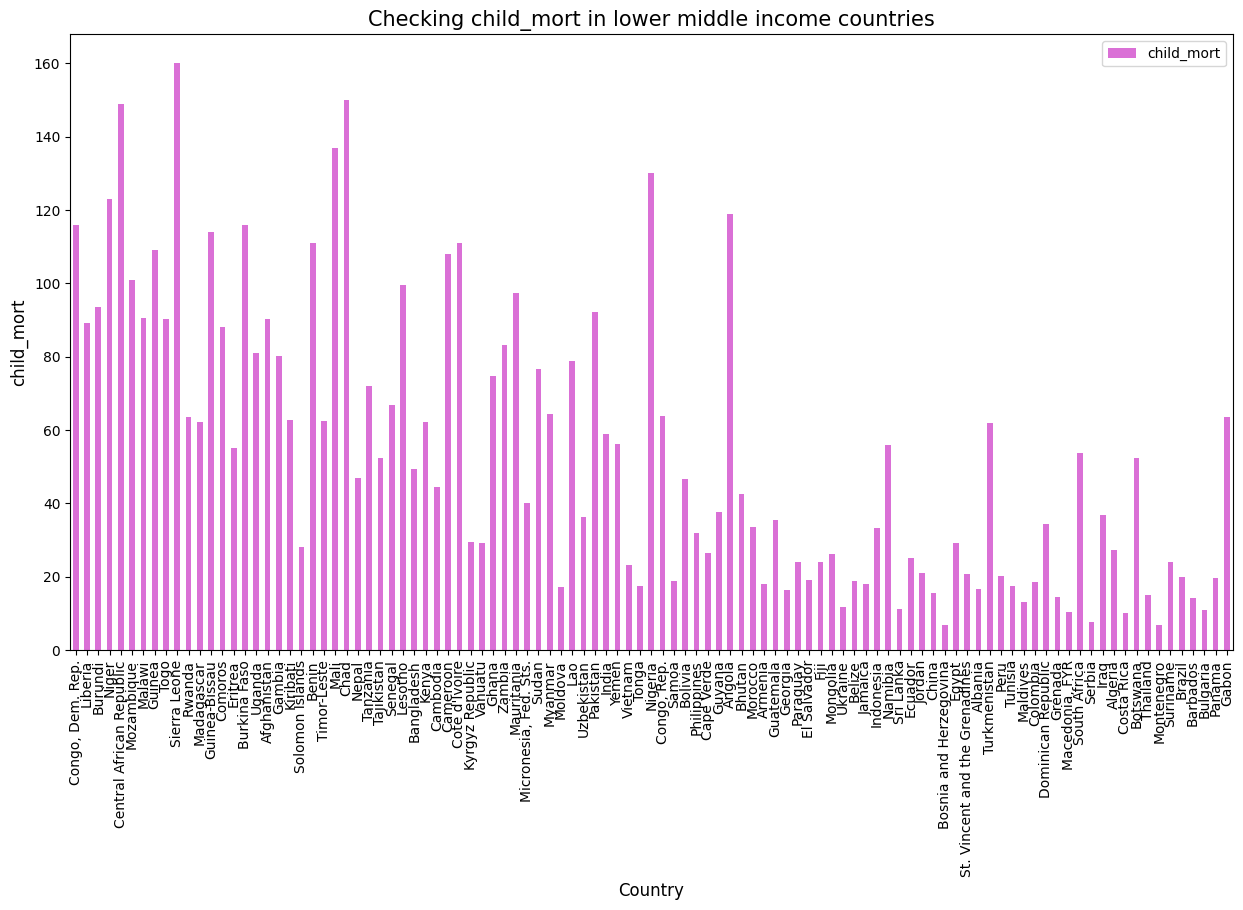

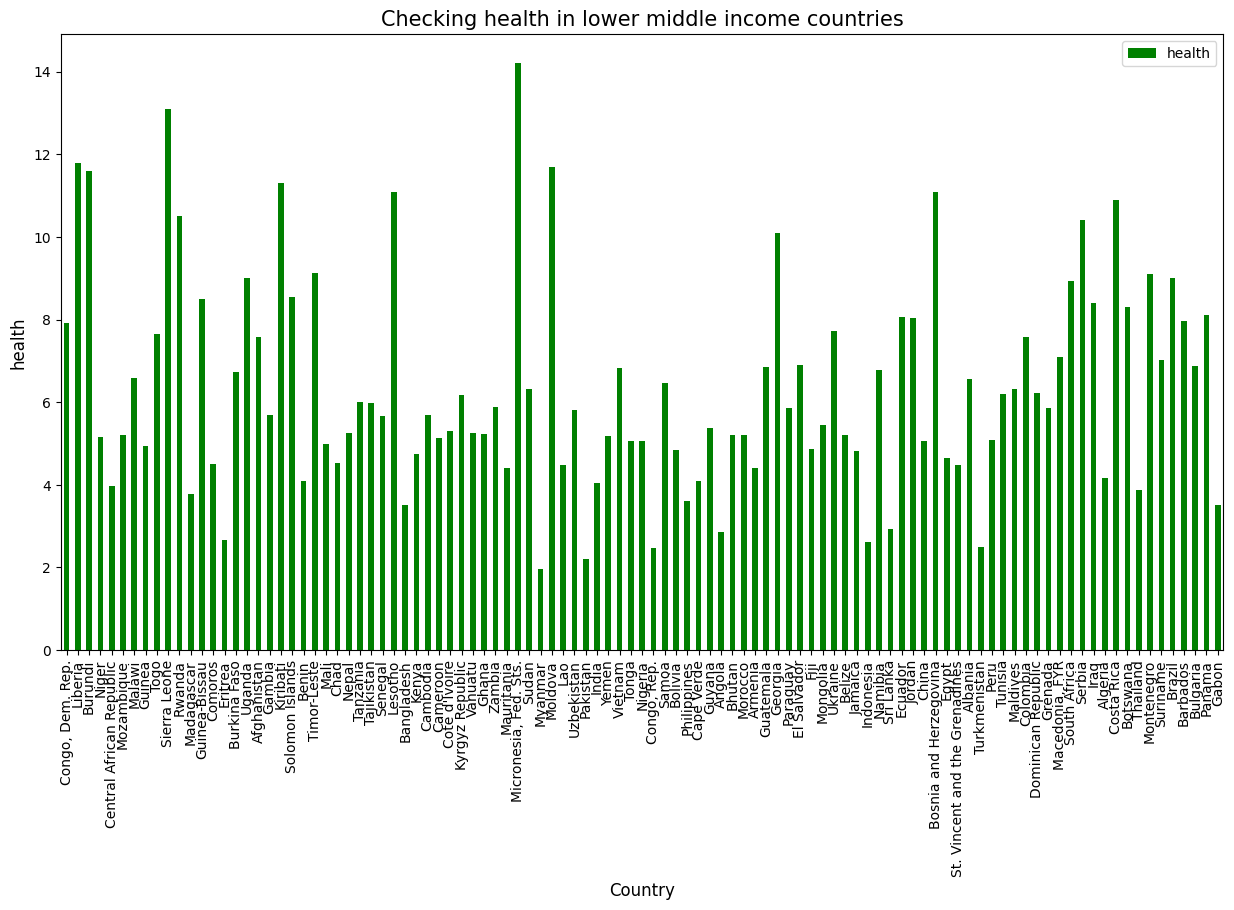

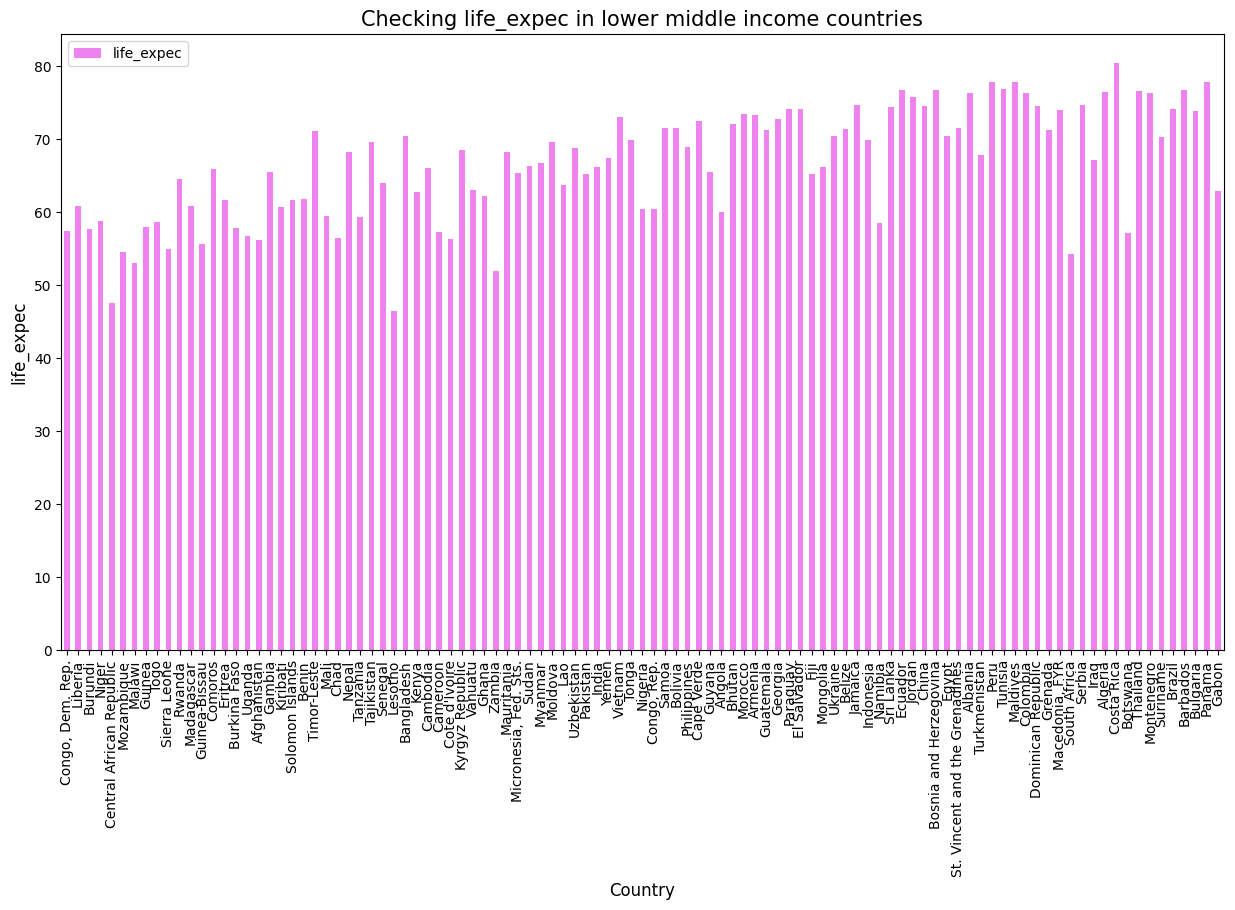

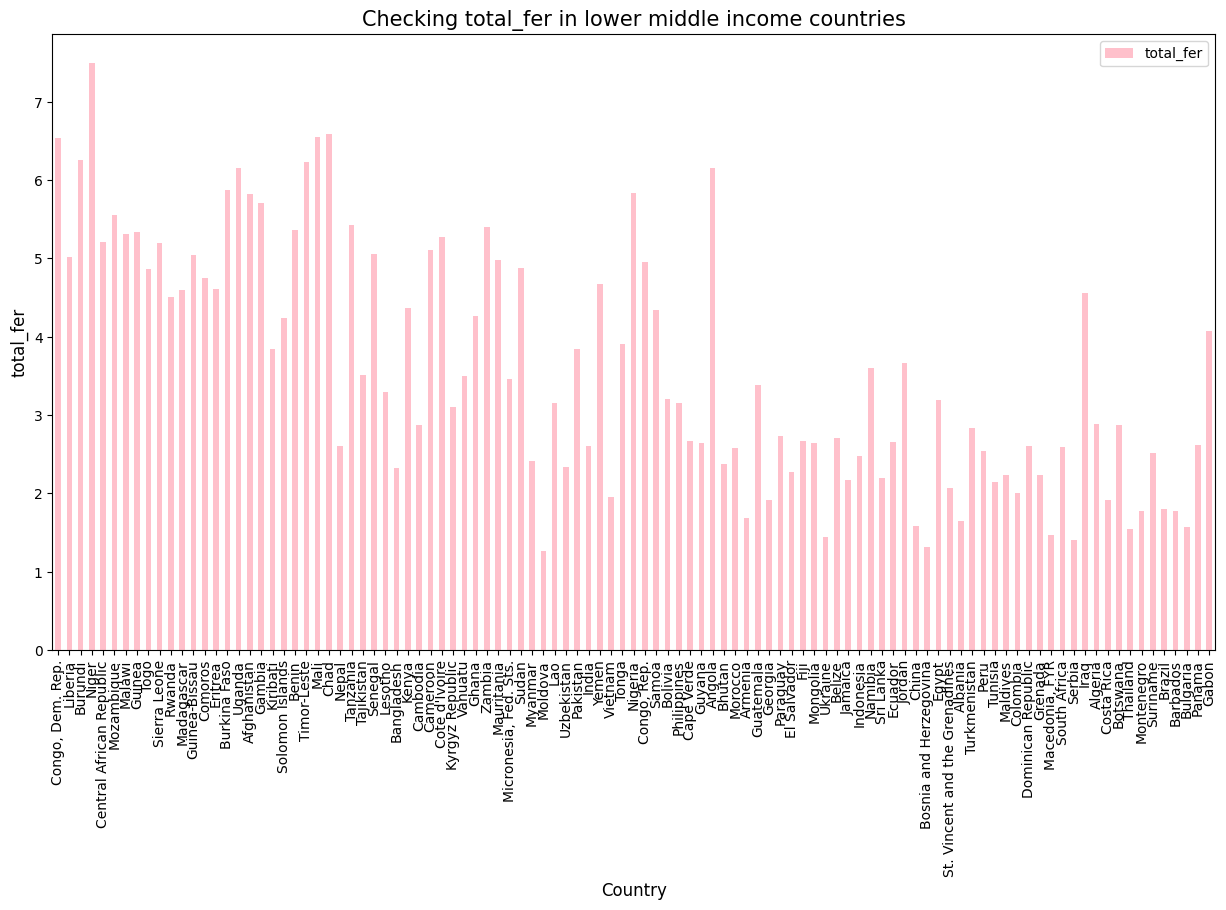

In [ ]:
lst=['exports','imports','income','gdpp','child_mort','health','life_expec','total_fer']
clr=["darkgreen",'coral','olive','salmon','orchid','green','violet','pink']

#nrows=2
ncols=2
i=0
for i in range(0,8):
    income_lower.plot(x="country", y=lst[i], kind="bar", fontsize=10,figsize=(15,8),color=clr[i])
    plt.xticks(rotation=90)
    plt.xlabel("Country",fontsize=12)
    plt.ylabel(lst[i],fontsize=12)
    plt.title("Checking " + lst[i]+ " in lower middle income countries",fontsize=15)

plt.show()

#Setting up PCA dimensionality reduction for the normal dataset

---



Now I do some feature engineering. First I scale the data and get the eigenvalues for the features in the data set. I will use PCA dimensionality reduction first

In [ ]:
#Scale the dataset
df2=df1.drop(['country'], axis = 1)
sclr=StandardScaler()
features=sclr.fit_transform(df2)

In [ ]:
#Transpose the features so that each row now represents a feature and each columns represents a datapoint.
cov_matrix = np.cov(features.T)
eig_val_cov , eig_vec_cov = np.linalg.eig(cov_matrix)
#Run a for loop that iterates and gets eigenvalues and eigenvectors for every scaled data point.
for i in range(len(eig_val_cov)):
    Eigvec_cov = eig_vec_cov[:, i]
    print('Eigenvector {}: \n{}'.format(i + 1, Eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * ('-'))

Eigenvector 1: 
[-0.43394888  0.2180521   0.19053264  0.06797265  0.40760932 -0.19403294
  0.43838004 -0.41648001  0.39216308]
Eigenvalue 1: 4.174206891924954
----------------------------------------
Eigenvector 2: 
[ 0.01092031 -0.57914858  0.16734619 -0.72292308  0.13596073  0.18498861
  0.12016224  0.01995164  0.21517901]
Eigenvalue 2: 1.5605537757634231
----------------------------------------
Eigenvector 3: 
[ 0.06993358 -0.33286965  0.66248513  0.22203403 -0.20353692 -0.58180382
 -0.10937063  0.06327364  0.01526353]
Eigenvalue 3: 1.1942819803660487
----------------------------------------
Eigenvector 4: 
[-0.37240426 -0.28603783 -0.32284936 -0.10423812 -0.39938894 -0.24858604
  0.22932151 -0.40679905 -0.47436248]
Eigenvalue 4: 0.9817028828343535
----------------------------------------
Eigenvector 5: 
[ 0.19326071  0.06177324 -0.50135844 -0.25877833  0.22086255 -0.71495456
 -0.10226045  0.18204034  0.19228024]
Eigenvalue 5: 0.6419698807636
----------------------------------------

In [ ]:
eig_df=df1.drop(['country'], axis = 1)

In [ ]:
eigen_values = {}
#Here I store the eigen values into a dictionary called eigen_values
for i, eigenvalue in enumerate(eig_val_cov):
    column_name = eig_df.columns[i]  # Have the column naames be equal to the columns in eig_df
    eigen_values[column_name] = eigenvalue

# Printing the dictionary of eigen values
print("Eigenvalues:")
for column_name, eigenvalue in eigen_values.items():
    print(f"{column_name}: {eigenvalue}")

Eigenvalues:
child_mort: 4.174206891924954
exports: 1.5605537757634231
health: 1.1942819803660487
imports: 0.9817028828343535
income: 0.6419698807636
inflation: 0.06920498276091758
life_expec: 0.08758897332937224
total_fer: 0.1880537941333695
gdpp: 0.15833745924197512


From here, I can see that child mortality is the biggest value. Followed by exports, health, and imports.
Inflation, life_exp, total_fer and gdpp have eigen values lower than the other parts of the dataset

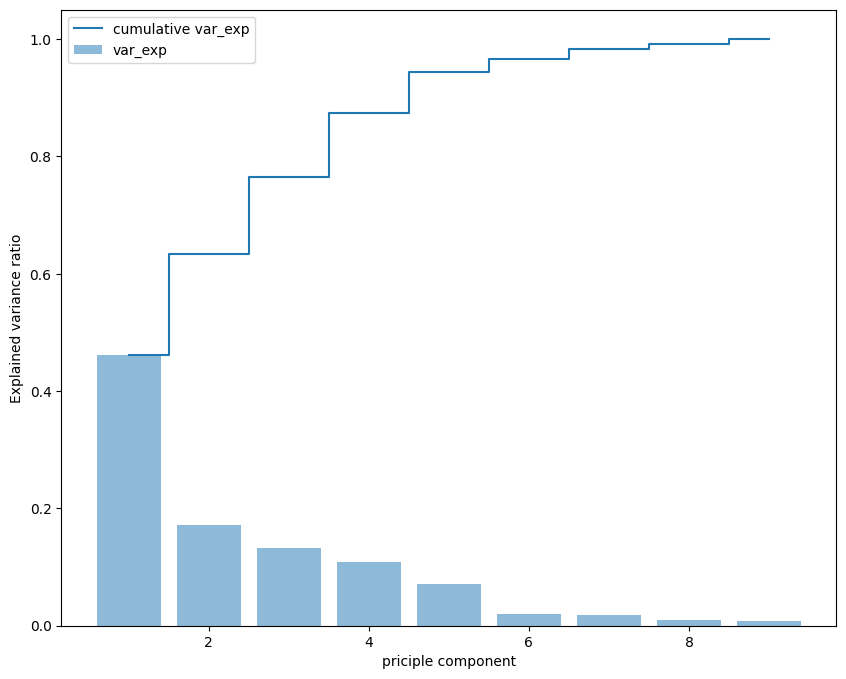

In [ ]:
sum_val= sum(eig_val_cov) #this line calculates the sum of all eigen values. The sum represents the total variance in the origional dataset
var_exp =[(i/sum_val) for i in sorted (eig_val_cov , reverse=True)] #This line calclulates the explained variance for each principle component
cum_var_exp =np.cumsum (var_exp) #This calculates explained variance using cumsum to show the total amount of variance

#plot the cumulative variance along side the variance explained per principle component
plt.figure(figsize=(10,8))
plt.bar(range(1,10) , var_exp , alpha= 0.5 , align='center' , label='var_exp')
plt.step(range(1,10),cum_var_exp , where='mid' , label='cumulative var_exp')
plt.ylabel('Explained variance ratio')
plt.xlabel('priciple component')
plt.legend(loc= 'best')
plt.show()

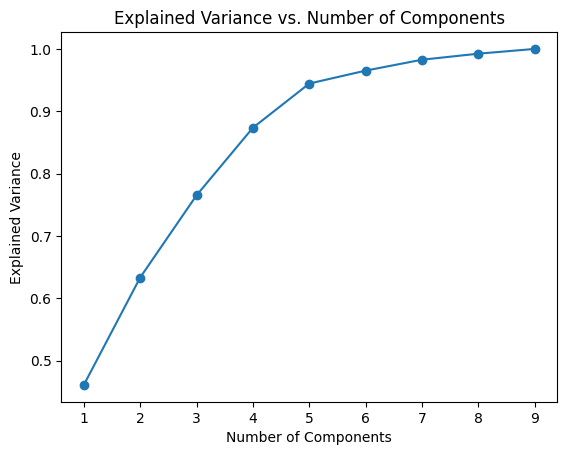

Best number of components: 1


In [ ]:
#This shows the same data as above, but in a line graph
explained_variances = []
num_components_range = np.arange(1, features.shape[1] + 1)

for n_components in num_components_range:
    # This creates PCA with the current number of components
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(features)

    # Calculate explained variance ratio
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

# Plot explained variances
plt.plot(num_components_range, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

# Finds the "elbow point" where explained variance gain diminishes
best_n_components = np.argmax(np.diff(explained_variances)) + 1
print("Best number of components:", best_n_components)

In [ ]:
pca = PCA(n_components=2)   #This runs the PCA on the features that were made earlier through the scaling.
pca.fit(features)
pca_=pca.transform(features)
pca_values = pd.DataFrame(pca.transform(features), columns=(["PCA1","PCA2"]))
pca_values

PCA1      PCA2
0    3.048435 -0.461250
1   -0.516435  0.007665
2    0.176420 -0.455400
3    3.091800  0.872149
4   -1.158028  0.782573
..        ...       ...
157  0.884768  1.043458
158  0.337376 -1.948193
159 -0.448420  2.431375
160  1.907300 -0.560641
161  2.969526 -0.155715

[162 rows x 2 columns]

From the previous two graphs, I can see that the total variance gets up to either one or almost one, meaning that the components listed cover either all or almost all of the explained variance.
The graphs also show that two components cover more then half of the total variance, and while it recommends one component, I believe that two will be more effective.

# Fuzzy C-Means Clustering with PCA
---



In [ ]:
#I want to see what different amount of clusters would look like on the PCA dataset using Fuzzy C-means.
#First I get the amount of clusters we're going to use, followed by creating empty lists for our results
num_cluster = [2, 3, 4, 5]
label = []
cntr = []
coe = []
silhoutte = []
harabasz = []
davies = []

for i in range(len(num_cluster)):
    fcm = FCM(n_clusters=num_cluster[i]) #iterate FCM over different cluster sizes using the num_clusters
    fcm.fit(pca_)
    fcm.predict(pca_)
    fcm_coe = fcm.partition_coefficient    #retrieve the partition coefficient
    fcm_centers = fcm.centers   #retrieve the cluster centers
    fcm_labels = fcm.predict(pca_)  #retrieve the cluster labels
    label.append(fcm_labels)
    coe.append(fcm_coe)
    score1 = silhouette_score(pca_, fcm_labels)    #run three statistical tests over our different cluster sizes
    score2 = calinski_harabasz_score(pca_, fcm_labels)
    score3 = davies_bouldin_score(pca_, fcm_labels)

    silhoutte.append(score1)      #Save the scores for all three tests over every cluster size
    harabasz.append(score2)
    davies.append(score3)

dict1 = {'num_cluster': num_cluster, 'silhoutte_score': silhoutte}
dict2 = {'num_cluster': num_cluster, 'harabasz_score': harabasz}
dict3 = {'num_cluster': num_cluster, 'davies_score': davies}     #Write the individual scores into a dictionary

evsilhoutte_scr = pd.DataFrame(dict1)
evharabasz_scr = pd.DataFrame(dict2)
evdavies_scr = pd.DataFrame(dict3)

In [ ]:
print(evsilhoutte_scr)
print(40*'-')
print(evharabasz_scr)
print(40*'-')
print(evdavies_scr)
print(40*'-')

   num_cluster  silhoutte_score
0            2         0.400563
1            3         0.369010
2            4         0.373567
3            5         0.396603
----------------------------------------
   num_cluster  harabasz_score
0            2      152.801861
1            3      144.739098
2            4      148.582368
3            5      158.129126
----------------------------------------
   num_cluster  davies_score
0            2      0.919019
1            3      0.941692
2            4      0.898368
3            5      0.791893
----------------------------------------


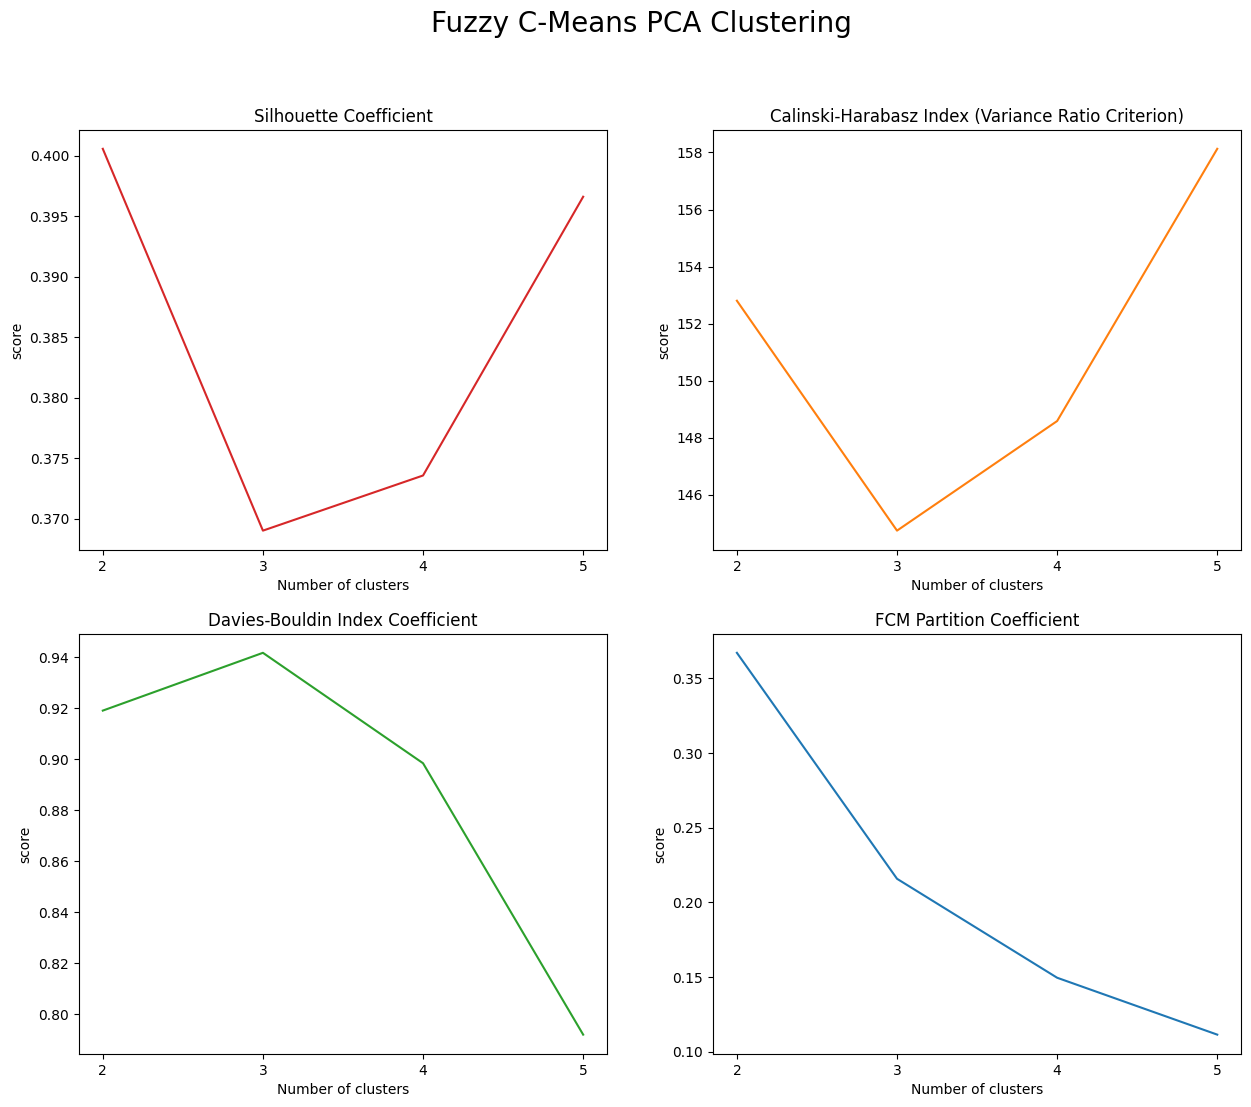

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(15,12))
fig.suptitle('Fuzzy C-Means PCA Clustering', fontsize=20)

axs[0, 0].plot(num_cluster,silhoutte,'tab:red')
axs[0, 0].set_title('Silhouette Coefficient',color='black')
axs[0, 0].tick_params(axis='x', colors='black')
axs[0, 0].tick_params(axis='y', colors='black')

axs[0, 1].plot(num_cluster,harabasz,'tab:orange')
axs[0, 1].set_title('Calinski-Harabasz Index (Variance Ratio Criterion)',color='black')
axs[0, 1].tick_params(axis='x', colors='black')
axs[0, 1].tick_params(axis='y', colors='black')


axs[1, 0].plot(num_cluster,davies,'tab:green')
axs[1, 0].set_title('Davies-Bouldin Index Coefficient',color='black')
axs[1, 0].tick_params(axis='x', colors='black')
axs[1, 0].tick_params(axis='y', colors='black')


axs[1, 1].plot(num_cluster,coe)
axs[1, 1].set_title('FCM Partition Coefficient',color='black')
axs[1, 1].tick_params(axis='x', colors='black')
axs[1, 1].tick_params(axis='y', colors='black')


for ax in axs.flat:
    ax.set(xlabel='Number of clusters', ylabel='score', xticks=[2,3,4,5])


The Silhouette measures the seperation and compactness of clusters. The Calinski-Harabasz measures the ratio of between-cluster variance and within-cluster variance. For both of those, higher is better.
The Davies-Bouldin measuers the average similarity between each cluster and its most similar cluster, lower values are better there. The FCM partition coefficient measures the degree of evenness in the distribution of membership degrees, and a higher value is better there.


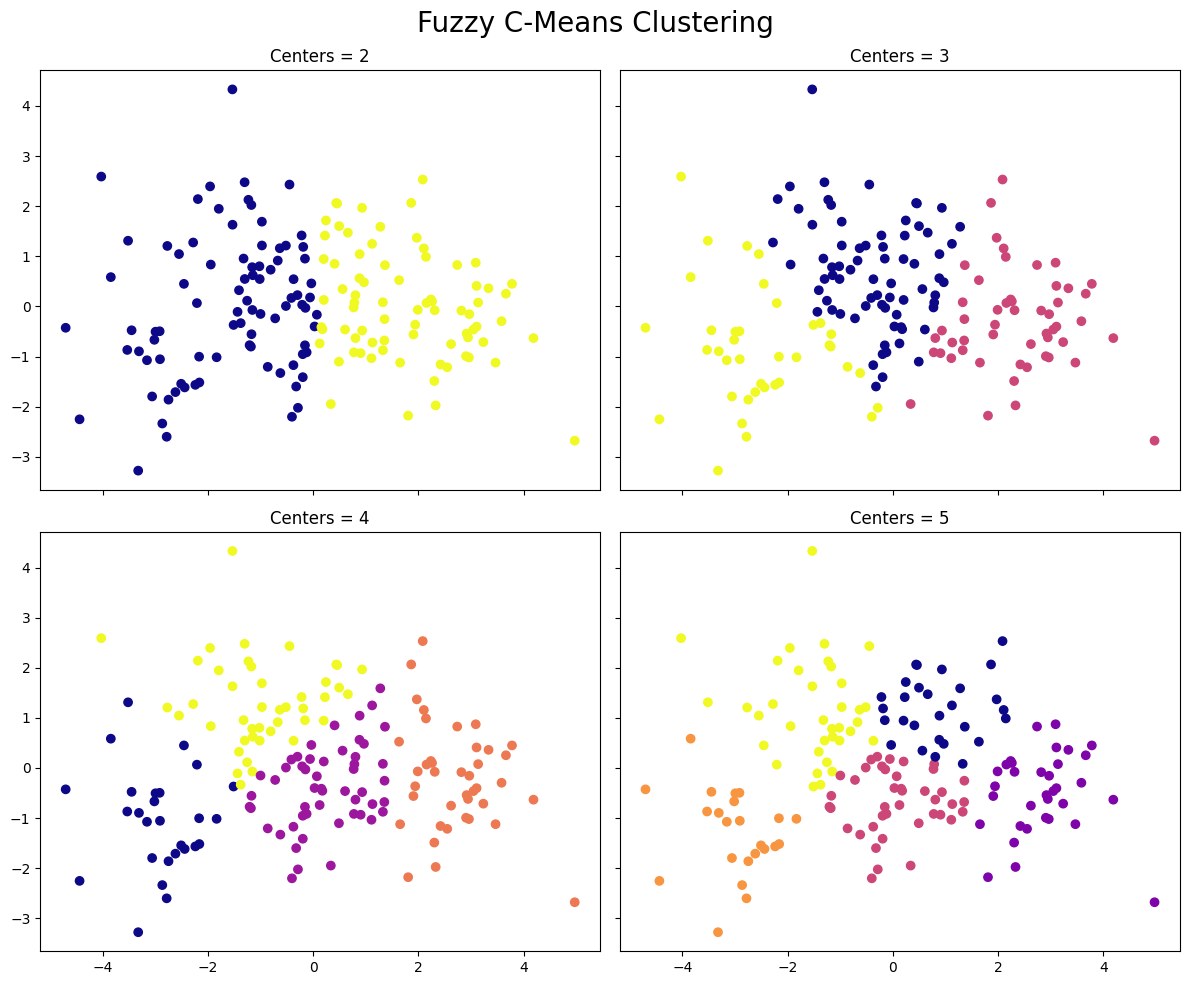

In [ ]:
# Visualize the clusters using the labels from fuzzy clusters, as well as the PCA values
# Create the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Fuzzy C-Means Clustering', fontsize=20)

#loop over different numbers of clusters and create scatter plots
for i, ax in enumerate(axes.flatten()):
    num_clusters = num_cluster[i]

    fcm = FCM(n_clusters=num_clusters)
    fcm.fit(pca_)
    fcm_labels = fcm.predict(pca_)

    scatter = ax.scatter(pca_values['PCA1'], pca_values['PCA2'], c=fcm_labels, cmap=plt.cm.plasma)
    ax.set_title(f'Centers = {num_clusters}')
    ax.label_outer()


plt.tight_layout()
plt.show()

Here I decide to see the clusters if we were to do Fuzzy Cluster Means (FCM). FCM assigns each data point to every cluster with a membership degree that indicates the degree of belongingness. Data points can belong to multiple clusters simultaneously, with varying degrees of membership.
I also iterate over the clusters to see which amount of total clusters would be the most effective amount. The best value is 3

In [ ]:
fcm = FCM(n_clusters = 3, random_state = 4)
fcm.fit(pca_)     #run fuzzy cluster means with the correct amount of clusters now, and having the random state as 4 throughout this project
fcm_centers=fcm.centers
fcm_labels=fcm.predict(pca_)

In [ ]:
df1['cluster_f']=fcm_labels  #put the labels into df1 to allow graphing by country
df1['fuzzy_cluster']=fcm_labels

In [ ]:
df1

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  cluster_f  fuzzy_cluster  
0         9.44        56.2       5.82    553          2              2  
1         4.49        76.3       1.65   4090          1              1  
2        16.10        76.5       2.89   4460          1              1  
3        22.40        60.1       6.16   3530          2              2  
4         1.44        76.8       2.13  12200          1              1  
..         ...         ...        ...    ...        ...            ...  
162       2.62        63.0       3.50   2970          1              1  
163      45.90        75.4       2.47  13500          2              2  
164      12.10        73.1       1.95   1310          1              1  
165      23.60        67.5       4.67   1310          2              2  
166      14.00        52.0       5.40   1460          2              2  

[162 rows x 12 columns]

In [ ]:
cluster_labels = df1["cluster_f"].unique()

# Define custom colors for each cluster
color_scale = ['rgb(255, 0, 0)',
               'rgb(31, 119, 180)',
               'rgb(255, 204, 0)',
               ]
#create a 3d scatter plot using plotly
scatter_traces = []
for label, color in zip(cluster_labels, color_scale):
    cluster_data = df1[df1["cluster_f"] == label]
    scatter_trace = go.Scatter3d(
        x=cluster_data['child_mort'],
        y=cluster_data['life_expec'],
        z=cluster_data['total_fer'],
        mode='markers',
        name=f'Cluster {label}',
        marker=dict(color=color, size=10, opacity=0.8),
    )
    scatter_traces.append(scatter_trace)
#label the scatter plot
layout = go.Layout(
    title='Fuzzy C-Means Clustering',
    scene=dict(
        xaxis=dict(title='Child Mortality'),
        yaxis=dict(title='Life Expectancy'),
        zaxis=dict(title='Total Fertility')
    ),
    showlegend=True
)
#plot it
fig = go.Figure(data=scatter_traces, layout=layout)
ply.iplot(fig)

In [ ]:
cluster_labels = df1["cluster_f"].unique()

color_scale = ['rgb(255, 0, 0)',
               'rgb(31, 119, 180)',
               'rgb(255, 204, 0)',
               ]

scatter_traces = []
for label, color in zip(cluster_labels, color_scale):
    cluster_data = df1[df1["cluster_f"] == label]
    scatter_trace = go.Scatter3d(
        x=cluster_data['income'],
        y=cluster_data['gdpp'],
        z=cluster_data['life_expec'],
        mode='markers',
        name=f'Cluster {label}',
        marker=dict(color=color, size=10, opacity=0.8),
    )
    scatter_traces.append(scatter_trace)

layout = go.Layout(
    title='Fuzzy C-Means Clustering',
    scene=dict(
        xaxis=dict(title='Income'),
        yaxis=dict(title='Gdpp'),
        zaxis=dict(title='Life_expec')
    ),
    showlegend=True
)

fig = go.Figure(data=scatter_traces, layout=layout)
ply.iplot(fig)

In [ ]:
cluster_labels = df1["cluster_f"].unique()

# Define custom colors for each cluster
color_scale = ['rgb(255, 0, 0)',
               'rgb(31, 119, 180)',
               'rgb(255, 204, 0)',
               ]

scatter_traces = []
for label, color in zip(cluster_labels, color_scale):
    cluster_data = df1[df1["cluster_f"] == label]
    scatter_trace = go.Scatter3d(
        x=cluster_data['income'],
        y=cluster_data['gdpp'],
        z=cluster_data['child_mort'],
        mode='markers',
        name=f'Cluster {label}',
        marker=dict(color=color, size=10, opacity=0.8),
    )
    scatter_traces.append(scatter_trace)

layout = go.Layout(
    title='Fuzzy C-Means Clustering',
    scene=dict(
        xaxis=dict(title='Income'),
        yaxis=dict(title='Gdpp'),
        zaxis=dict(title='Child Mortality')
    ),
    showlegend=True
)

fig = go.Figure(data=scatter_traces, layout=layout)
ply.iplot(fig)

In [ ]:
df1['fuzzy_cluster'] = df1['fuzzy_cluster'].replace([0], 'needs_low_financial_assistance')
df1['fuzzy_cluster'] = df1['fuzzy_cluster'].replace([1], 'needs_medium_financial_assistance')
df1['fuzzy_cluster'] = df1['fuzzy_cluster'].replace([2], 'needs_high_financial_assistance')

In [ ]:
legend_labels = {
    'needs_high_financial_assistance': 'High Assistance',
    'needs_medium_financial_assistance': 'Medium Assistance',
    'needs_low_financial_assistance': 'Low Assistance'
}
#I make a Chloropleth, which uses data and countries or states to make a map using our data
fig = px.choropleth(
    df1[['country', 'fuzzy_cluster']],
    locations=df1['country'],
    locationmode='country names',
    color=df1['fuzzy_cluster'],
    color_discrete_map={
        'needs_high_financial_assistance': 'red',
        'needs_medium_financial_assistance': 'gold',
        'needs_low_financial_assistance': 'cyan'
    },
    projection='orthographic',
)

fig.update_traces(showlegend=True)  # Make sure legend is shown

# Customize the colorbar (legend)
colorbar_title = 'Cluster'  # Set the desired legend title
fig.update_layout(
    coloraxis_colorbar=dict(
        title=colorbar_title,
        tickvals=[0, 1, 2],  # adjust the legend values to the data
        ticktext=list(legend_labels.values())
    )
)
fig.update_layout(
    title='Fuzzy C-Means Financial Assistance Needed'
)
fig.show()

From here on, every different machine learning algorith will be using the same graphs to indicate how they look to show any differences between cluster numbering and shape.

# Hierarchical Clustering with PCA

Here I decide to see the clusters using Higherarchical clustering with PCA. Higherarchical clustering tends to build a treelike hierarchy of clusters within the data.
I also iterate over the clusters to see which amount of total clusters would be the most effective amount, similar to how I did with Fuzzy C-Means

In [ ]:
np.random.seed=4
#similar to last time, I find out what the optimal amount of clusters will be for the dataset. iterating and collecting statistical scores for each cluster amount, from 2 to 5
Hnum_cluster = [2, 3, 4, 5]
H_silhoutte = []
H_harabasz = []
H_davies = []

for i in range(len(Hnum_cluster)):
    h_cluster = AgglomerativeClustering(n_clusters=Hnum_cluster[i], affinity='euclidean', linkage='average')
    h_cluster_pred = h_cluster.fit_predict(pca_)

    h_score1 = silhouette_score(pca_, h_cluster_pred)
    h_score2 = calinski_harabasz_score(pca_, h_cluster_pred)
    h_score3 = davies_bouldin_score(pca_, h_cluster_pred)

    H_silhoutte.append(h_score1)
    H_harabasz.append(h_score2)
    H_davies.append(h_score3)

dict1 = {'num_cluster': Hnum_cluster, 'silhoutte_score': H_silhoutte}
dict2 = {'num_cluster': Hnum_cluster, 'harabasz_score': H_harabasz}
dict3 = {'num_cluster': Hnum_cluster, 'davies_score': H_davies}

H_evsilhoutte_scr = pd.DataFrame(dict1)
H_evharabasz_scr = pd.DataFrame(dict2)
H_evdavies_scr = pd.DataFrame(dict3)

In [ ]:
print(H_evsilhoutte_scr)
print(40*'-')
print(H_evharabasz_scr)
print(40*'-')
print(H_evdavies_scr)
print(40*'-')

   num_cluster  silhoutte_score
0            2         0.382294
1            3         0.346467
2            4         0.339873
3            5         0.320769
----------------------------------------
   num_cluster  harabasz_score
0            2        7.225976
1            3       41.210276
2            4       88.847589
3            5       69.236973
----------------------------------------
   num_cluster  davies_score
0            2      0.800134
1            3      0.720227
2            4      0.743228
3            5      0.647937
----------------------------------------


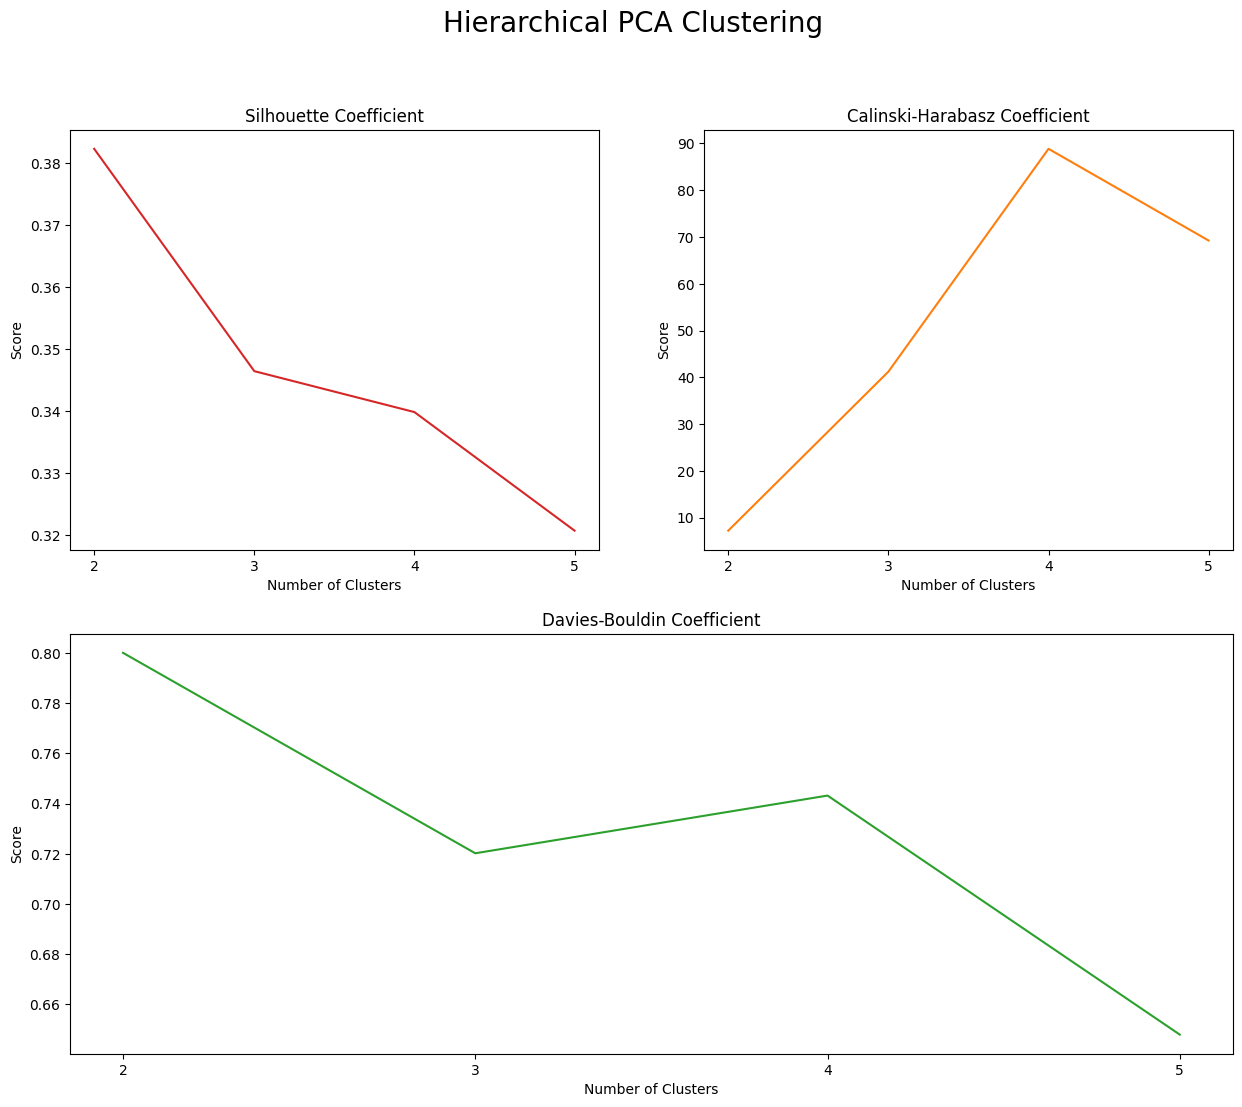

In [ ]:
#same plot from earlier, just adapted to Hierarchical Clustering data
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(15, 12))

ax = plt.subplot(gs[0, 0])
plt.plot(Hnum_cluster, H_silhoutte, 'tab:red')
plt.title('Silhouette Coefficient', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks([2, 3, 4, 5])

ax = plt.subplot(gs[0, 1])
plt.plot(Hnum_cluster, H_harabasz, 'tab:orange')
plt.title('Calinski-Harabasz Coefficient', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks([2, 3, 4, 5])

ax = plt.subplot(gs[1, :])
plt.plot(Hnum_cluster, H_davies, 'tab:green')
plt.title('Davies-Bouldin Coefficient', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks([2, 3, 4, 5])
plt.suptitle('Hierarchical PCA Clustering', fontsize=20)

plt.show()


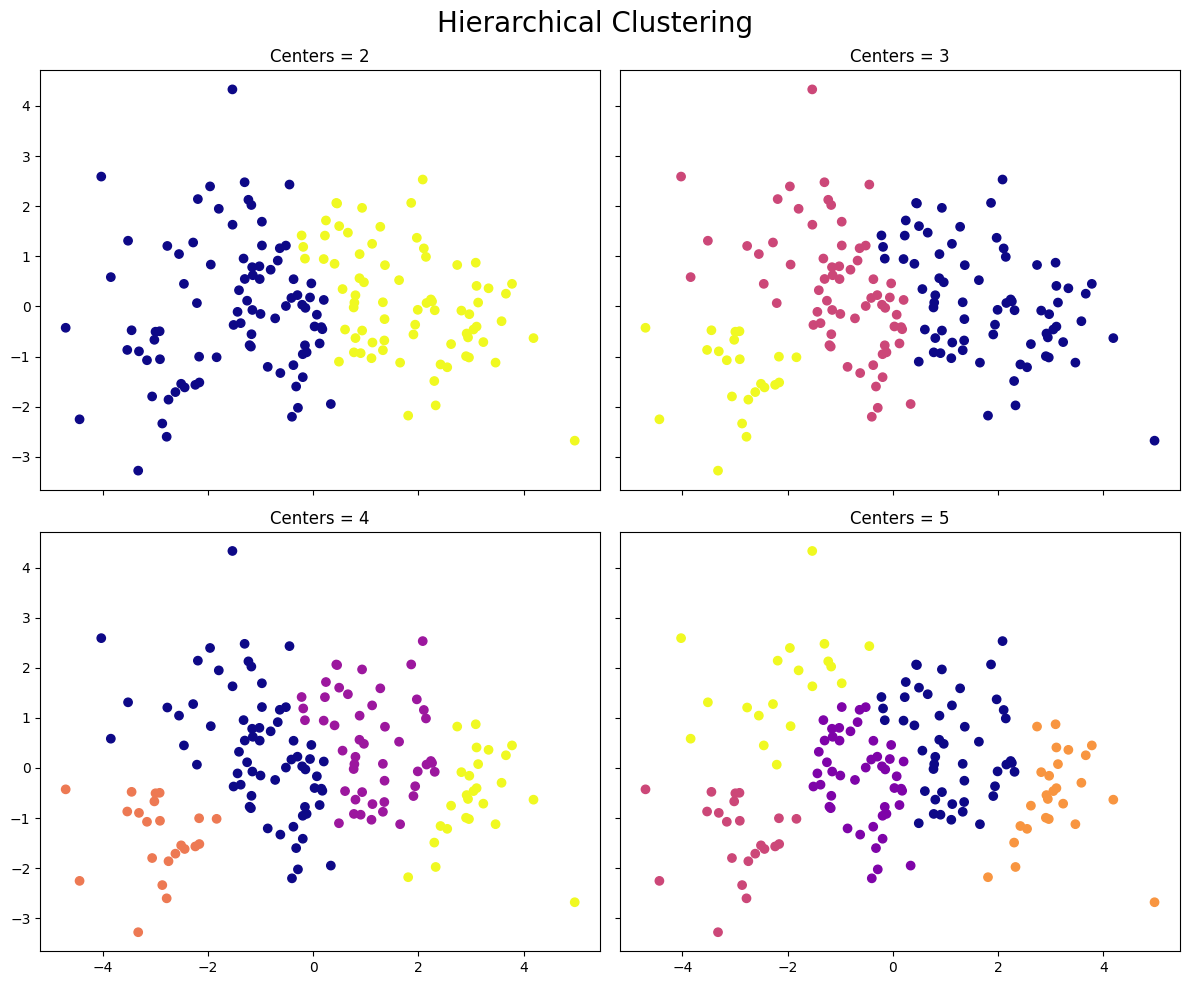

In [ ]:
# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Hierarchical Clustering', fontsize=20)

# Loop over different numbers of clusters and create scatter plots
for i, ax in enumerate(axes.flatten()):
    Hnum_clusters = num_cluster[i]

    agg = AgglomerativeClustering(n_clusters=Hnum_clusters)
    agg_labels = agg.fit_predict(pca_)

    scatter = ax.scatter(pca_values['PCA1'], pca_values['PCA2'], c=agg_labels, cmap=plt.cm.plasma)
    ax.set_title(f'Centers = {Hnum_clusters}')
    ax.label_outer()

plt.tight_layout()
plt.show()

After finding the best ammount of clusters and the best score to test, I then run a for loop to see which hierarchical clustering works best for the dataset. Two possible parameters are affinities and linkages and this goes through three examples of them to find which works the best for 3 clusters

In [ ]:
best_score = -1  # Initialize with a low value
best_params = {}

n_clusters = 3
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['ward', 'complete', 'average']   #These are the different affinities and linkages that Agglomerative clustering can have

for linkage in linkages:
    if linkage == 'ward':
        possible_affinities = ['euclidean'] #the linkage ward only works for the euclidean affinity
    else:
        possible_affinities = affinities  #all other linkages and affinities run through each other

    for affinity in possible_affinities:
        agg = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage) #Have each affinity/linkage run through in a for loop
        cluster_labels = agg.fit_predict(pca_)
        score = silhouette_score(pca_, cluster_labels)  # Using silhouette score as an example metric

        if score > best_score:   #get the silhouette score of each affinity/linkage and have that saved as the best score to be the deciding statistic
            best_score = score
            best_params = {'affinity': affinity, 'linkage': linkage}

print("Best parameters:", best_params)
print("Best silhouette score:", best_score)

Best parameters: {'affinity': 'euclidean', 'linkage': 'ward'}
Best silhouette score: 0.35279696346346834


In [ ]:
np.random.seed=4
#I plug in the best parameters given, with the best cluster amount
agg = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage='ward')
h_cluster_pred= agg.fit_predict(pca_)

In [ ]:
df3=df.drop(index = [66, 91, 98, 123, 133])
df3['cluster_h']=h_cluster_pred
df3['Hierarchical_cluster']=h_cluster_pred

In [ ]:
cluster_labels = df3["cluster_h"].unique()

color_scale = ['rgb(255, 0, 0)',
               'rgb(31, 119, 180)',
               'rgb(255, 204, 0)',
               ]

scatter_traces = []
for label, color in zip(cluster_labels, color_scale):
    cluster_data = df3[df3["cluster_h"] == label]
    scatter_trace = go.Scatter3d(
        x=cluster_data['child_mort'],
        y=cluster_data['life_expec'],
        z=cluster_data['total_fer'],
        mode='markers',
        name=f'Cluster {label}',
        marker=dict(color=color, size=10, opacity=0.8),
    )
    scatter_traces.append(scatter_trace)

layout = go.Layout(
    title='Higherarchical Clustering',
    scene=dict(
        xaxis=dict(title='Child Mortality'),
        yaxis=dict(title='Life Expectancy'),
        zaxis=dict(title='Total Fertility')
    ),
    showlegend=True
)

fig = go.Figure(data=scatter_traces, layout=layout)
ply.iplot(fig)

In [ ]:
cluster_labels = df3["cluster_h"].unique()

# Define custom colors for each cluster
color_scale = ['rgb(255, 0, 0)',
               'rgb(31, 119, 180)',
               'rgb(255, 204, 0)',
               ]

scatter_traces = []
for label, color in zip(cluster_labels, color_scale):
    cluster_data = df3[df3["cluster_h"] == label]
    scatter_trace = go.Scatter3d(
        x=cluster_data['income'],
        y=cluster_data['gdpp'],
        z=cluster_data['child_mort'],
        mode='markers',
        name=f'Cluster {label}',
        marker=dict(color=color, size=10, opacity=0.8),
    )
    scatter_traces.append(scatter_trace)

layout = go.Layout(
    title='Higherarchical Clustering',
    scene=dict(
        xaxis=dict(title='Income'),
        yaxis=dict(title='Gdpp'),
        zaxis=dict(title='Child Mortality')
    ),
    showlegend=True
)

fig = go.Figure(data=scatter_traces, layout=layout)
ply.iplot(fig)

In [ ]:
cluster_labels = df3["cluster_h"].unique()

# Define custom colors for each cluster
color_scale = ['rgb(255, 0, 0)',
               'rgb(31, 119, 180)',
               'rgb(255, 204, 0)',
               ]

scatter_traces = []
for label, color in zip(cluster_labels, color_scale):
    cluster_data = df3[df3["cluster_h"] == label]
    scatter_trace = go.Scatter3d(
        x=cluster_data['income'],
        y=cluster_data['gdpp'],
        z=cluster_data['life_expec'],
        mode='markers',
        name=f'Cluster {label}',
        marker=dict(color=color, size=10, opacity=0.8),
    )
    scatter_traces.append(scatter_trace)

layout = go.Layout(
    title='Higherarchical Clustering',
    scene=dict(
        xaxis=dict(title='Income'),
        yaxis=dict(title='Gdpp'),
        zaxis=dict(title='Life Expectancy')
    ),
    showlegend=True
)

fig = go.Figure(data=scatter_traces, layout=layout)
ply.iplot(fig)

In [ ]:
df3['Hierarchical_cluster'] = df3['Hierarchical_cluster'].replace([2], 'needs_low_financial_assistance')
df3['Hierarchical_cluster'] = df3['Hierarchical_cluster'].replace([1], 'needs_medium_financial_assistance')
df3['Hierarchical_cluster'] = df3['Hierarchical_cluster'].replace([0], 'needs_high_financial_assistance')

In [ ]:
legend_labels = {
    'needs_high_financial_assistance': 'High Assistance',
    'needs_medium_financial_assistance': 'Medium Assistance',
    'needs_low_financial_assistance': 'Low Assistance'
}

fig = px.choropleth(
    df3[['country', 'Hierarchical_cluster']],
    locations=df3['country'],
    locationmode='country names',
    color=df3['Hierarchical_cluster'],
    color_discrete_map={
        'needs_high_financial_assistance': 'red',
        'needs_medium_financial_assistance': 'gold',
        'needs_low_financial_assistance': 'cyan'
    },
    projection='orthographic',
)

fig.update_traces(showlegend=True)


colorbar_title = 'Cluster'
fig.update_layout(
    coloraxis_colorbar=dict(
        title=colorbar_title,
        tickvals=[0, 1, 2],
        ticktext=list(legend_labels.values())
    )
)
fig.update_layout(
    title='Hierarchical Financial Assistance Needed')
fig.show()

# KMeans with PCA

---



Here I use KMeans with our PCA dataset. KMeans is a common machine learning algorithm that chooses k-observations at random then makes centroids. I use the same data set as before, just slightly changing it to allow KMeans to use the dataset, over hierarchical clustering and Fuzzy C-Means

In [ ]:
np.random.seed = 4
#same as before, getting the best possible cluster amounts using the statistical scoring as I did previously
k_cluster = [2, 3, 4, 5]
klabel = []
kcntr = []
k_coe = []
k_silhoutte = []
k_harabasz = []
k_davies = []

for i in range(len(num_cluster)):
    Kmean = KMeans(n_clusters=k_cluster[i])
    Kmean.fit(pca_)
    Kmean.predict(pca_)
    k_labels = Kmean.predict(pca_)
    klabel.append(k_labels)

    kcoe = Kmean.inertia_
    k_coe.append(kcoe)

    kscore1 = silhouette_score(pca_, k_labels)
    kscore2 = calinski_harabasz_score(pca_, k_labels)
    kscore3 = davies_bouldin_score(pca_, k_labels)

    k_silhoutte.append(kscore1)
    k_harabasz.append(kscore2)
    k_davies.append(kscore3)

dict1 = {'num_cluster': k_cluster, 'silhoutte_score': k_silhoutte}
dict2 = {'num_cluster': k_cluster, 'harabasz_score': k_harabasz}
dict3 = {'num_cluster': k_cluster, 'davies_score': k_davies}

k_evsilhoutte_scr = pd.DataFrame(dict1).set_index('num_cluster')
k_evharabasz_scr = pd.DataFrame(dict2).set_index('num_cluster')
k_evdavies_scr = pd.DataFrame(dict3).set_index('num_cluster')

In [ ]:
print(k_evsilhoutte_scr)
print(40*'-')
print(k_evharabasz_scr)
print(40*'-')
print(k_evdavies_scr)
print(40*'-')

             silhoutte_score
num_cluster                 
2                   0.400563
3                   0.385926
4                   0.380293
5                   0.397647
----------------------------------------
             harabasz_score
num_cluster                
2                152.801861
3                145.858638
4                150.066717
5                159.826173
----------------------------------------
             davies_score
num_cluster              
2                0.919019
3                0.870164
4                0.866786
5                0.787411
----------------------------------------


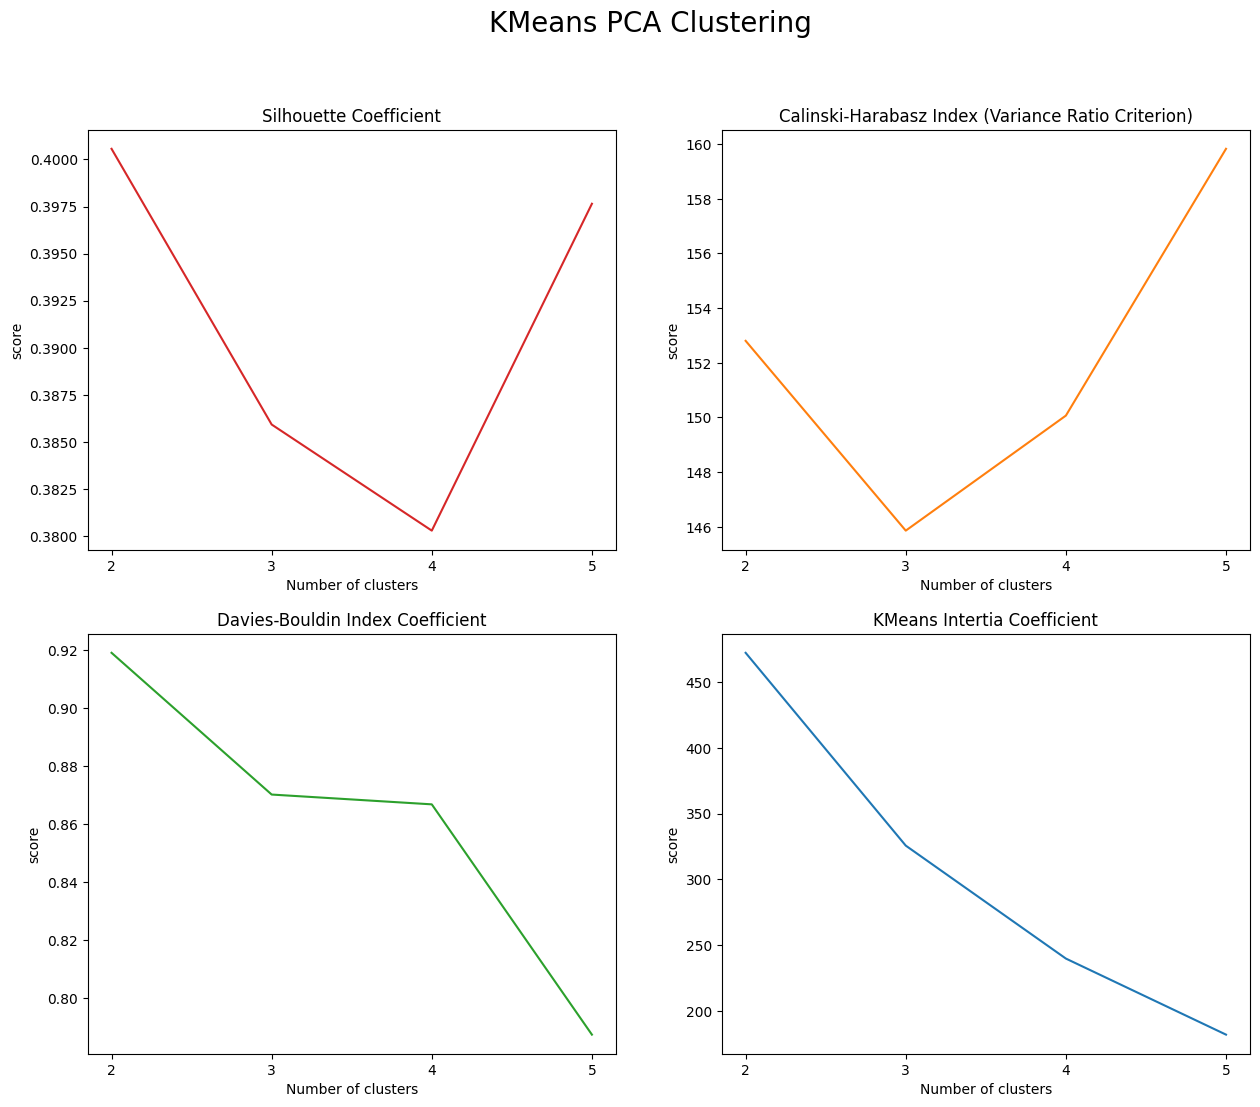

In [ ]:

fig, axs = plt.subplots(2, 2,figsize=(15,12))
fig.suptitle('KMeans PCA Clustering', fontsize=20)

axs[0, 0].plot(k_cluster,k_silhoutte,'tab:red')
axs[0, 0].set_title('Silhouette Coefficient',color='black')
axs[0, 0].tick_params(axis='x', colors='black')
axs[0, 0].tick_params(axis='y', colors='black')

axs[0, 1].plot(k_cluster,k_harabasz,'tab:orange')
axs[0, 1].set_title('Calinski-Harabasz Index (Variance Ratio Criterion)',color='black')
axs[0, 1].tick_params(axis='x', colors='black')
axs[0, 1].tick_params(axis='y', colors='black')


axs[1, 0].plot(k_cluster,k_davies,'tab:green')
axs[1, 0].set_title('Davies-Bouldin Index Coefficient',color='black')
axs[1, 0].tick_params(axis='x', colors='black')
axs[1, 0].tick_params(axis='y', colors='black')


axs[1, 1].plot(k_cluster,k_coe)
axs[1, 1].set_title('KMeans Intertia Coefficient',color='black')
axs[1, 1].tick_params(axis='x', colors='black')
axs[1, 1].tick_params(axis='y', colors='black')

for ax in axs.flat:
    ax.set(xlabel='Number of clusters', ylabel='score', xticks=[2,3,4,5])


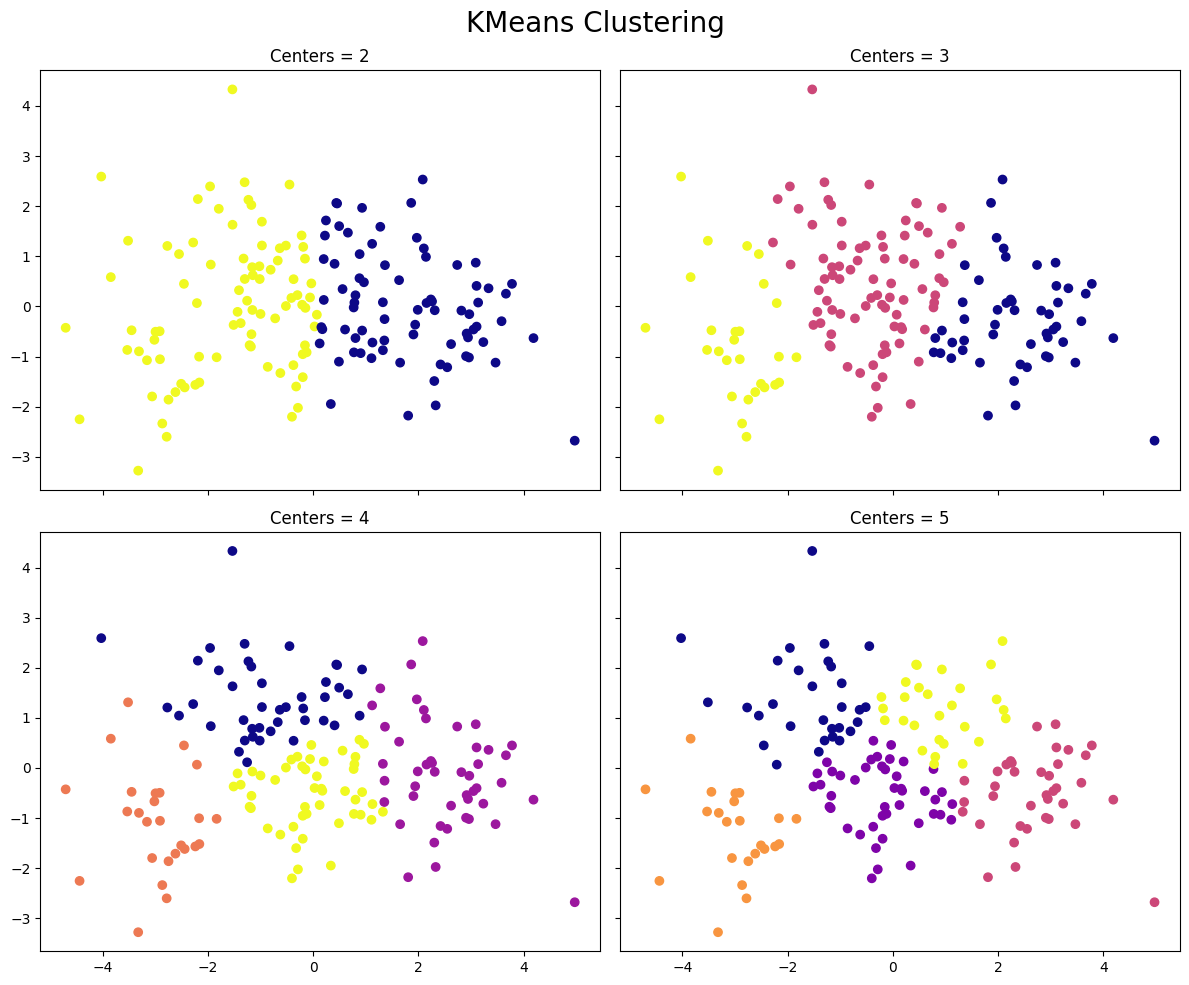

In [ ]:
# Visualize the clusters using the labels from fuzzy clusters, as well as the PCA values
# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('KMeans Clustering', fontsize=20)

# Loop over different numbers of clusters and create scatter plots
for i, ax in enumerate(axes.flatten()):
    num_clusters = num_cluster[i]

    Kmeans = KMeans(n_clusters=num_clusters)
    Kmeans.fit(pca_)
    k_labels = Kmeans.predict(pca_)

    scatter = ax.scatter(pca_values['PCA1'], pca_values['PCA2'], c=k_labels, cmap=plt.cm.plasma)
    ax.set_title(f'Centers = {num_clusters}')
    ax.label_outer()


plt.tight_layout()
plt.show()

In [ ]:
K_means = KMeans(n_clusters = 3, random_state = 4)
K_means.fit(pca_)
Km_centers=K_means.cluster_centers_
Km_labels=K_means.fit_predict(pca_)
#initiate the model

In [ ]:
df_k=df.drop(index=[66, 91, 98, 123, 133])
df_k['cluster_k']=Km_labels
df_k['Kmeans_Cluster']=Km_labels
#create another dataset for ease of access

In [ ]:
cluster_labels = df_k["cluster_k"].unique()

color_scale = ['rgb(255, 0, 0)',
               'rgb(31, 119, 180)',
               'rgb(255, 204, 0)',
               ]

scatter_traces = []
for label, color in zip(cluster_labels, color_scale):
    cluster_data = df_k[df_k["cluster_k"] == label]
    scatter_trace = go.Scatter3d(
        x=cluster_data['child_mort'],
        y=cluster_data['life_expec'],
        z=cluster_data['total_fer'],
        mode='markers',
        name=f'Cluster {label}',
        marker=dict(color=color, size=10, opacity=0.8),
    )
    scatter_traces.append(scatter_trace)

layout = go.Layout(
    title='KMeans Clustering',
    scene=dict(
        xaxis=dict(title='Child Mortality'),
        yaxis=dict(title='Life Expectancy'),
        zaxis=dict(title='Total Fertility')
    ),
    showlegend=True
)

fig = go.Figure(data=scatter_traces, layout=layout)
ply.iplot(fig)

In [ ]:
cluster_labels = df_k["cluster_k"].unique()

color_scale = ['rgb(255, 0, 0)',
               'rgb(31, 119, 180)',
               'rgb(255, 204, 0)',
               ]

scatter_traces = []
for label, color in zip(cluster_labels, color_scale):
    cluster_data = df_k[df_k["cluster_k"] == label]
    scatter_trace = go.Scatter3d(
        x=cluster_data['income'],
        y=cluster_data['gdpp'],
        z=cluster_data['child_mort'],
        mode='markers',
        name=f'Cluster {label}',
        marker=dict(color=color, size=10, opacity=0.8),
    )
    scatter_traces.append(scatter_trace)

layout = go.Layout(
    title='KMeans Clustering',
    scene=dict(
        xaxis=dict(title='Income'),
        yaxis=dict(title='Gdpp'),
        zaxis=dict(title='Child Mortality')
    ),
    showlegend=True
)

fig = go.Figure(data=scatter_traces, layout=layout)
ply.iplot(fig)

In [ ]:
cluster_labels = df_k["cluster_k"].unique()

color_scale = ['rgb(255, 0, 0)',
               'rgb(31, 119, 180)',
               'rgb(255, 204, 0)',
               ]

scatter_traces = []
for label, color in zip(cluster_labels, color_scale):
    cluster_data = df_k[df_k["cluster_k"] == label]
    scatter_trace = go.Scatter3d(
        x=cluster_data['income'],
        y=cluster_data['gdpp'],
        z=cluster_data['life_expec'],
        mode='markers',
        name=f'Cluster {label}',
        marker=dict(color=color, size=10, opacity=0.8),
    )
    scatter_traces.append(scatter_trace)

layout = go.Layout(
    title='KMeans Clustering',
    scene=dict(
        xaxis=dict(title='Income'),
        yaxis=dict(title='Gdpp'),
        zaxis=dict(title='Life Expectancy')
    ),
    showlegend=True
)

fig = go.Figure(data=scatter_traces, layout=layout)
ply.iplot(fig)

In [ ]:
df_k['Kmeans_Cluster'] = df_k['Kmeans_Cluster'].replace([1], 'needs_low_financial_assistance')
df_k['Kmeans_Cluster'] = df_k['Kmeans_Cluster'].replace([2], 'needs_medium_financial_assistance')
df_k['Kmeans_Cluster'] = df_k['Kmeans_Cluster'].replace([0], 'needs_high_financial_assistance')

Looking at the above graphs, it is apparent that the clusters, while visually are the same, are labeled incorrectly. For the earlier machine learning algorithms, the clusters represented the same data. Here, the clusters are visually the same, but are labeled incorrectly. As such, in order for our chlorpleth to work, I have to change the labels differently to get the same visual results.

In [ ]:
legend_labels = {
    'needs_high_financial_assistance': 'High Assistance',
    'needs_medium_financial_assistance': 'Medium Assistance',
    'needs_low_financial_assistance': 'Low Assistance'
}

fig = px.choropleth(
    df_k[['country', 'Kmeans_Cluster']],
    locations=df_k['country'],
    locationmode='country names',
    color=df_k['Kmeans_Cluster'],
    color_discrete_map={
        'needs_high_financial_assistance': 'red',
        'needs_medium_financial_assistance': 'gold',
        'needs_low_financial_assistance': 'cyan'
    },
    projection='orthographic',
)

fig.update_traces(showlegend=True)

colorbar_title = 'Cluster'
fig.update_layout(
    coloraxis_colorbar=dict(
        title=colorbar_title,
        tickvals=[0, 1, 2],
        ticktext=list(legend_labels.values())
    )
)
fig.update_layout(
    title='KMeans Financial Assistance Needed')
fig.show()

# KMeans Clustering with t-SNE

---



Here I use a different dimensionality reduction technique, called t-SNE. t-SNE works by measuring the similarity between data points in both high-dimensional space and low-dimensional space. Afterwards, it tries to minimizes the divergence between the two using similarity matricies.

In [ ]:
df_t=df.drop(index = [66, 91, 98, 123, 133])
#Create another dataframe for ease of access

In [ ]:
df_t1=df_t.drop(['country'], axis = 1)
sclr=StandardScaler()
features_T=sclr.fit_transform(df_t1)

In [ ]:
features_T

array([[ 1.36439201, -1.40890411,  0.26788326, ..., -1.72328979,
         1.87448005, -0.6984134 ],
       [-0.56064601, -0.52340423, -0.10824431, ...,  0.69280331,
        -0.87789731, -0.47994298],
       [-0.28078315, -0.01178207, -0.97735462, ...,  0.71684403,
        -0.05944457, -0.45708913],
       ...,
       [-0.38540478,  1.64115106, -0.00234432, ...,  0.30815167,
        -0.67988455, -0.65165566],
       [ 0.47772368, -0.42501535, -0.6085305 , ..., -0.3649887 ,
         1.11543113, -0.65165566],
       [ 1.17868861, -0.08065428, -0.34925809, ..., -2.22814506,
         1.59726218, -0.64239059]])

The next bit of code is my second most intensive for-loop. It works over t-SNE with KMeans clustering prediction labels and has three hyperparameters. Two hyperparameters have five different values, and one has three. Combined, this line has to iterate over 75 differet variations to find the best combination, using the silhouette coefficient to find the "best".

In [ ]:
np.random.seed=4
# Parameters to iterate over
perplexity_range = [5, 10, 20, 30, 50]
angle_range = [0.2, 0.5, 0.8]
distance_metrics = ['correlation', 'cosine', 'minkowski', 'euclidean', 'canberra']

# Store best results and metrics
tbest_silhouette_score = -1
tbest_calinski_harabasz_score = -1
tbest_davies_bouldin_score = float('inf')
tbest_combination = None

num_clusters = 3  # Number of clusters
tKmean = KMeans(n_clusters=num_clusters)
tcluster_labels = tKmean.fit_predict(features_T)  # Assuming features_T is your standardized dataset

for perplexity in perplexity_range:
    for angle in angle_range:
        for distance_metric in distance_metrics:
            # Create t-SNE model.
            t_sne_model = TSNE(n_components=3, perplexity=perplexity, angle=angle, metric=distance_metric, random_state=0)

            # Fit and transform data to all combinations.
            t_sne_results = t_sne_model.fit_transform(features_T)

            # Calculate evaluation metrics
            tsilhouette = silhouette_score(t_sne_results, tcluster_labels)
            tcalinski_harabasz = calinski_harabasz_score(t_sne_results, tcluster_labels)
            tdavies_bouldin = davies_bouldin_score(t_sne_results, tcluster_labels)

            # Check if the current combination is the best
            if tsilhouette > tbest_silhouette_score:
                tbest_silhouette_score = tsilhouette
                tbest_calinski_harabasz_score = tcalinski_harabasz
                tbest_davies_bouldin_score = tdavies_bouldin
                tbest_combination = {
                    'perplexity': perplexity,
                    'angle': angle,
                    'distance_metric': distance_metric,
                    'tsne_results': t_sne_results,
                    'silhouette_score': tsilhouette,
                    'calinski_harabasz_score': tcalinski_harabasz,
                    'davies_bouldin_score': tdavies_bouldin
                }

# Print the best combination and relevant scores
print("Best Combination:")
print("Perplexity:", tbest_combination['perplexity'])
print("Angle:", tbest_combination['angle'])
print("Distance Metric:", tbest_combination['distance_metric'])
print("t-SNE results shape:", tbest_combination['tsne_results'].shape)
print("Best Silhouette Score:", tbest_combination['silhouette_score'])
print("Best Calinski-Harabasz Score:", tbest_combination['calinski_harabasz_score'])
print("Best Davies-Bouldin Score:", tbest_combination['davies_bouldin_score'])

Best Combination:
Perplexity: 20
Angle: 0.8
Distance Metric: minkowski
t-SNE results shape: (162, 3)
Best Silhouette Score: 0.3525666
Best Calinski-Harabasz Score: 149.6449167295632
Best Davies-Bouldin Score: 0.9039865703022087


In [ ]:
np.random.seed=4     #run t-SNE using the best results from above
tsne = TSNE(n_components=2,
            metric=tbest_combination['distance_metric'],
            perplexity=tbest_combination['perplexity'],
            angle=tbest_combination['angle'])
tsne_results = tsne.fit_transform(features_T)
tsne_values = pd.DataFrame(tsne_results, columns=["TSNE1", "TSNE2"])

In [ ]:
#same as before, run the dataset through, find the best amount of clusters
np.random.seed = 4
t_cluster = [2, 3, 4, 5]
tlabel = []
tcntr = []
T_coe = []
t_silhoutte = []
t_harabasz = []
t_davies = []

for i in range(len(num_cluster)):
    Kmean = KMeans(n_clusters=t_cluster[i])
    Kmean.fit(tsne_results)
    Kmean.predict(tsne_results)
    t_labels = Kmean.predict(tsne_results)
    tlabel.append(t_labels)

    k_centers = fcm.centers

    tcoe = Kmean.inertia_
    T_coe.append(tcoe)

    tscore1 = silhouette_score(tsne_results, t_labels)
    tscore2 = calinski_harabasz_score(tsne_results, t_labels)
    tscore3 = davies_bouldin_score(tsne_results, t_labels)

    t_silhoutte.append(tscore1)
    t_harabasz.append(tscore2)
    t_davies.append(tscore3)

dict1 = {'num_cluster': t_cluster, 'silhoutte_score': t_silhoutte}
dict2 = {'num_cluster': t_cluster, 'harabasz_score': t_harabasz}
dict3 = {'num_cluster': t_cluster, 'davies_score': t_davies}

t_evsilhoutte_scr = pd.DataFrame(dict1).set_index('num_cluster')
t_evharabasz_scr = pd.DataFrame(dict2).set_index('num_cluster')
t_evdavies_scr = pd.DataFrame(dict3).set_index('num_cluster')

In [ ]:
print(t_evsilhoutte_scr)
print(40*'-')
print(t_evharabasz_scr)
print(40*'-')
print(t_evdavies_scr)
print(40*'-')

             silhoutte_score
num_cluster                 
2                   0.503515
3                   0.461917
4                   0.480797
5                   0.459955
----------------------------------------
             harabasz_score
num_cluster                
2                267.436883
3                294.120410
4                322.552459
5                305.693811
----------------------------------------
             davies_score
num_cluster              
2                0.704277
3                0.786409
4                0.715801
5                0.771292
----------------------------------------


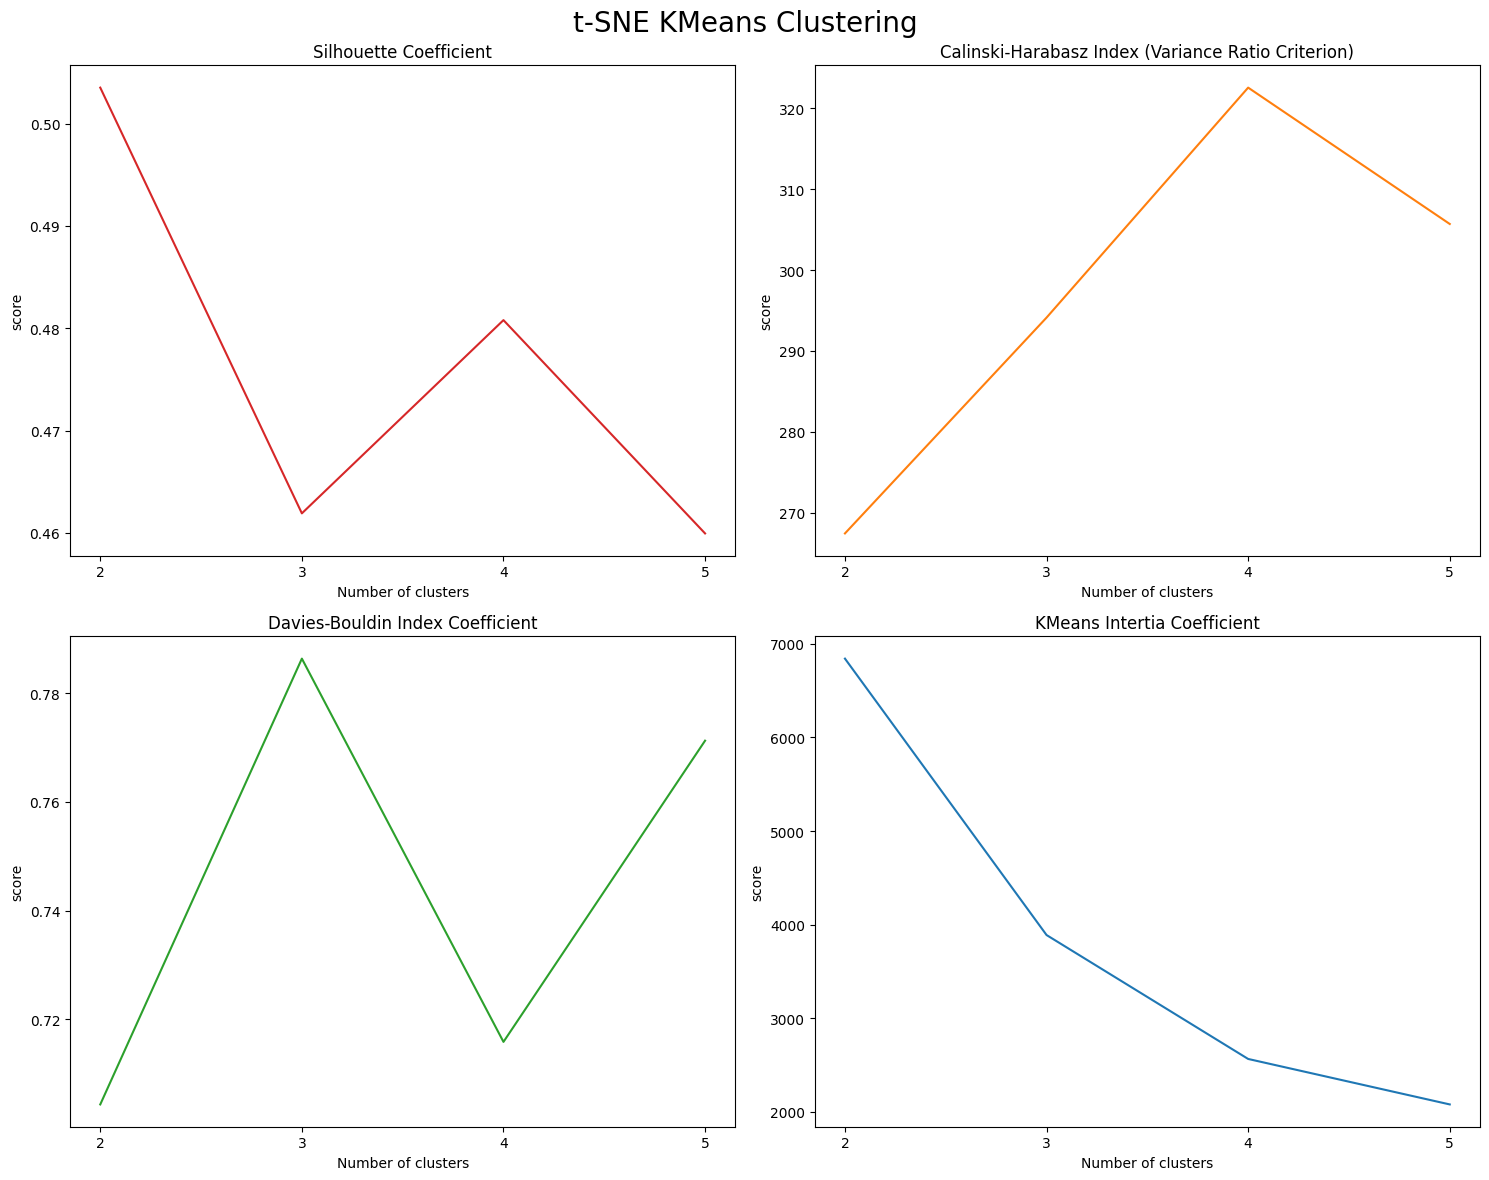

In [ ]:
#print the statistical analysis on graphs and the coeffecients
fig, axs = plt.subplots(2, 2,figsize=(15,12))
fig.suptitle('t-SNE KMeans Clustering', fontsize=20)

axs[0, 0].plot(t_cluster,t_silhoutte,'tab:red')
axs[0, 0].set_title('Silhouette Coefficient',color='black')
axs[0, 0].tick_params(axis='x', colors='black')
axs[0, 0].tick_params(axis='y', colors='black')

axs[0, 1].plot(t_cluster,t_harabasz,'tab:orange')
axs[0, 1].set_title('Calinski-Harabasz Index (Variance Ratio Criterion)',color='black')
axs[0, 1].tick_params(axis='x', colors='black')
axs[0, 1].tick_params(axis='y', colors='black')


axs[1, 0].plot(t_cluster,t_davies,'tab:green')
axs[1, 0].set_title('Davies-Bouldin Index Coefficient',color='black')
axs[1, 0].tick_params(axis='x', colors='black')
axs[1, 0].tick_params(axis='y', colors='black')


axs[1, 1].plot(t_cluster,T_coe)
axs[1, 1].set_title('KMeans Intertia Coefficient',color='black')
axs[1, 1].tick_params(axis='x', colors='black')
axs[1, 1].tick_params(axis='y', colors='black')

for ax in axs.flat:
    ax.set(xlabel='Number of clusters', ylabel='score', xticks=[2,3,4,5])
plt.tight_layout()
plt.show()

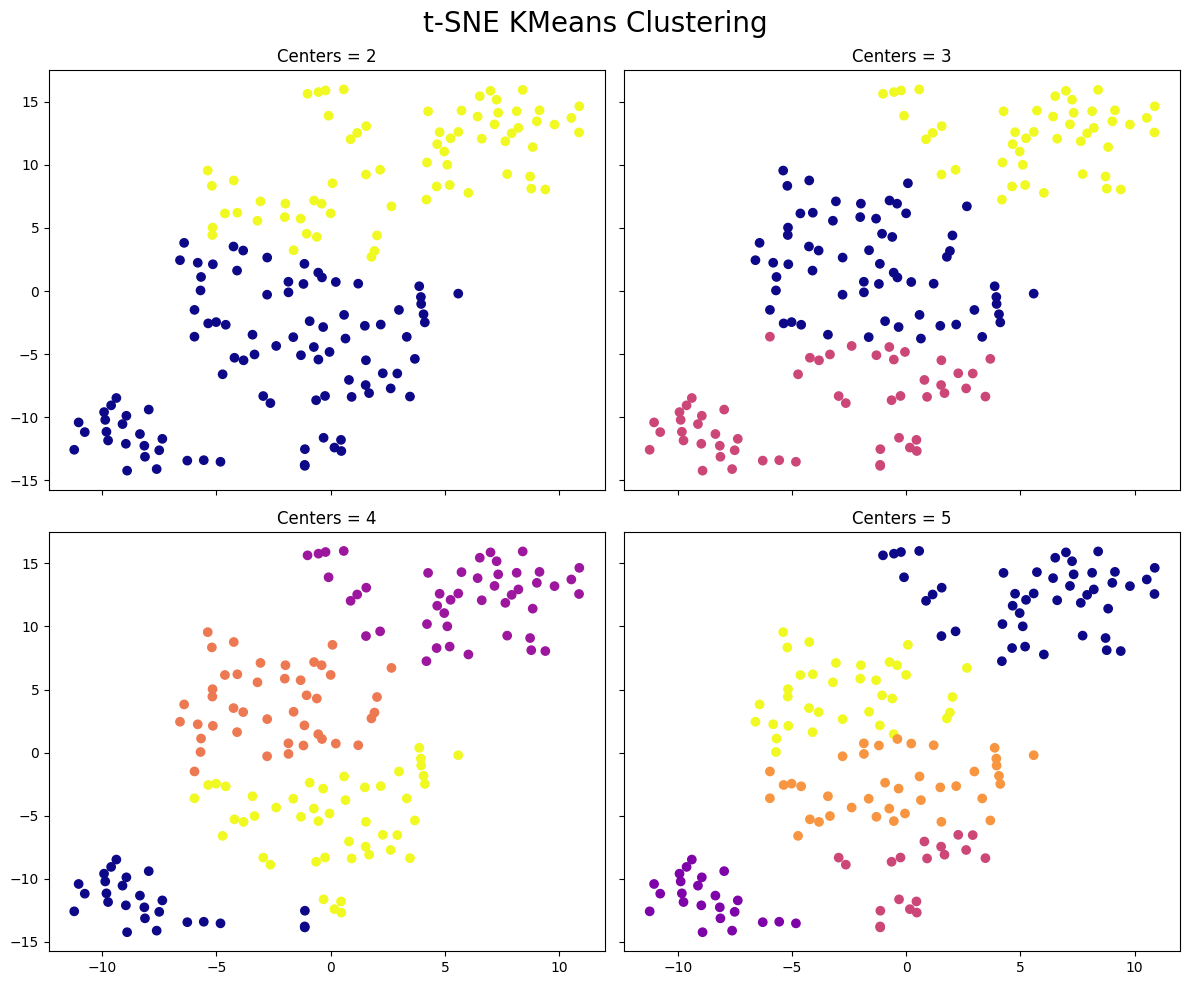

In [ ]:
# Visualize the clusters
# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('t-SNE KMeans Clustering', fontsize=20)

# Loop over different numbers of clusters and create scatter plots
for i, ax in enumerate(axes.flatten()):
    num_clusters = num_cluster[i]

    Kmeans = KMeans(n_clusters=num_clusters)
    Kmeans.fit(tsne_results)
    k_labels = Kmeans.predict(tsne_results)

    scatter = ax.scatter(tsne_values['TSNE1'], tsne_values['TSNE2'], c=k_labels, cmap=plt.cm.plasma)
    ax.set_title(f'Centers = {num_clusters}')
    ax.label_outer()


plt.tight_layout()
plt.show()

In [ ]:
#initiate the model
K_means = KMeans(n_clusters=3, random_state=4)
K_means.fit(tsne_results)
Km_centers = K_means.cluster_centers_
Km_labels = K_means.predict(tsne_results)

In [ ]:
df_t['cluster_k']=Km_labels
df_t['agglo_cluster']=Km_labels
#get the labels to use for graphing

In [ ]:
#same graphs as before. with the new data
cluster_labels = df_t["cluster_k"].unique()

color_scale = ['rgb(255, 0, 0)',
               'rgb(31, 119, 180)',
               'rgb(255, 204, 0)',
               ]

scatter_traces = []
for label, color in zip(cluster_labels, color_scale):
    cluster_data = df_t[df_t["cluster_k"] == label]
    scatter_trace = go.Scatter3d(
        x=cluster_data['child_mort'],
        y=cluster_data['life_expec'],
        z=cluster_data['total_fer'],
        mode='markers',
        name=f'Cluster {label}',
        marker=dict(color=color, size=10, opacity=0.8),
    )
    scatter_traces.append(scatter_trace)

layout = go.Layout(
    title='t-SNE KMeans Clustering',
    scene=dict(
        xaxis=dict(title='Child Mortality'),
        yaxis=dict(title='Life Expectancy'),
        zaxis=dict(title='Total Fertility')
    ),
    showlegend=True
)

fig = go.Figure(data=scatter_traces, layout=layout)
ply.iplot(fig)

In [ ]:
cluster_labels = df_t["cluster_k"].unique()

color_scale = ['rgb(255, 0, 0)',
               'rgb(31, 119, 180)',
               'rgb(255, 204, 0)',
               ]

scatter_traces = []
for label, color in zip(cluster_labels, color_scale):
    cluster_data = df_t[df_t["cluster_k"] == label]
    scatter_trace = go.Scatter3d(
        x=cluster_data['income'],
        y=cluster_data['gdpp'],
        z=cluster_data['life_expec'],
        mode='markers',
        name=f'Cluster {label}',
        marker=dict(color=color, size=10, opacity=0.8),
    )
    scatter_traces.append(scatter_trace)

layout = go.Layout(
    title='t-SNE KMeans Clustering',
    scene=dict(
        xaxis=dict(title='Income'),
        yaxis=dict(title='Gdpp'),
        zaxis=dict(title='Life Expec')
    ),
    showlegend=True
)

fig = go.Figure(data=scatter_traces, layout=layout)
ply.iplot(fig)

In [ ]:
cluster_labels = df_t["cluster_k"].unique()

color_scale = ['rgb(255, 0, 0)',
               'rgb(31, 119, 180)',
               'rgb(255, 204, 0)',
               ]

scatter_traces = []
for label, color in zip(cluster_labels, color_scale):
    cluster_data = df_t[df_t["cluster_k"] == label]
    scatter_trace = go.Scatter3d(
        x=cluster_data['income'],
        y=cluster_data['gdpp'],
        z=cluster_data['life_expec'],
        mode='markers',
        name=f'Cluster {label}',
        marker=dict(color=color, size=10, opacity=0.8),
    )
    scatter_traces.append(scatter_trace)

layout = go.Layout(
    title='t-SNE KMeans Clustering',
    scene=dict(
        xaxis=dict(title='Income'),
        yaxis=dict(title='Gdpp'),
        zaxis=dict(title='Life Expectancy')
    ),
    showlegend=True
)

fig = go.Figure(data=scatter_traces, layout=layout)
ply.iplot(fig)

In [ ]:
df_t['cluster_k'] = df_t['cluster_k'].replace([1], 'needs_low_financial_assistance')
df_t['cluster_k'] = df_t['cluster_k'].replace([2], 'needs_medium_financial_assistance')
df_t['cluster_k'] = df_t['cluster_k'].replace([0], 'needs_high_financial_assistance')

Same as before, the cluster names are different. However, the cluster shape is similar to the PCA versions in that it needs to be re-labeled.

In [ ]:
legend_labels = {
    'needs_high_financial_assistance': 'High Assistance',
    'needs_medium_financial_assistance': 'Medium Assistance',
    'needs_low_financial_assistance': 'Low Assistance'
}

fig = px.choropleth(
    df_t[['country', 'cluster_k']],
    locations=df_t['country'],
    locationmode='country names',
    color=df_t['cluster_k'],
    color_discrete_map={
        'needs_high_financial_assistance': 'red',
        'needs_medium_financial_assistance': 'gold',
        'needs_low_financial_assistance': 'cyan'
    },
    projection='orthographic',
)

fig.update_traces(showlegend=True)

colorbar_title = 'Cluster'
fig.update_layout(
    coloraxis_colorbar=dict(
        title=colorbar_title,
        tickvals=[0, 1, 2],
        ticktext=list(legend_labels.values())
    )
)

fig.show()

# Hierarchical Clustering with UMAP
---



The previous datasets worked great with PCA and t-SNE. From here I work with one more dimensionality reduction technique, UMAP. I see whether UMAP could cluster the dataset better or worse then PCA. UMAP works differently by minimizing the divergence between two distributions. UMAP is similar to t-SNE.

In [ ]:
df_h=df.drop(index = [66, 91, 98, 123, 133])

In [ ]:
df_h1=df_h.drop(['country'], axis = 1)
sclr=StandardScaler()
features_H=sclr.fit_transform(df_h1)

In [ ]:
features_H    #I create a a new features dataset. Just incase. There is no harm in getting everything neat.

array([[ 1.36439201, -1.40890411,  0.26788326, ..., -1.72328979,
         1.87448005, -0.6984134 ],
       [-0.56064601, -0.52340423, -0.10824431, ...,  0.69280331,
        -0.87789731, -0.47994298],
       [-0.28078315, -0.01178207, -0.97735462, ...,  0.71684403,
        -0.05944457, -0.45708913],
       ...,
       [-0.38540478,  1.64115106, -0.00234432, ...,  0.30815167,
        -0.67988455, -0.65165566],
       [ 0.47772368, -0.42501535, -0.6085305 , ..., -0.3649887 ,
         1.11543113, -0.65165566],
       [ 1.17868861, -0.08065428, -0.34925809, ..., -2.22814506,
         1.59726218, -0.64239059]])

The next bit of code is my most intensive for-loop. It works over UMAP with agglomerative clustering prediction labels and has three hyperparameters. Each hyperparameter has five seperate type of parameters, leading to 125 different combinations that are measured using the silhouette coefficient to find the "best".

In [ ]:
np.random.seed=4
# Parameters to iterate over
n_neighbors_range = [2, 3, 4, 5, 6] #an array of neighbor possiblities
min_dist_range = np.linspace(0.1, 0.5, 5)  #Sets the minimum distance to 0.1, to 0.5, and 5 steps between, 0.2, 0.3, and 0.4
distance_metrics = ['correlation', 'cosine', 'minkowski', 'euclidean', 'canberra'] #goes through 5 common distance metrics used in UMAP

# Store best results and metrics
best_silhouette_score = -1
best_calinski_harabasz_score = -1
best_davies_bouldin_score = float('inf')
best_combination = None

# Perform Agglomerative clustering
num_clusters = 3  # I'm using three clusters here to match the earlier PCA total clusters amount
Aggclus = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = Aggclus.fit_predict(features_H)

# Iterate through parameter combinations with three for loops
for n_neighbors in n_neighbors_range:
    for min_dist in min_dist_range:
        for metric in distance_metrics:
            # Create UMAP models.
            umap_model = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, metric=metric)

            # Fit and transform data to all combinations. There are 125 possible combinations so this line will take time to go through.
            umap_results = umap_model.fit_transform(features_H)

            # Calculate evaluation metrics
            silhouette = silhouette_score(umap_results, cluster_labels)
            calinski_harabasz = calinski_harabasz_score(umap_results, cluster_labels)
            davies_bouldin = davies_bouldin_score(umap_results, cluster_labels)

            # Check if the current combination is the best by running through an if statement
            if silhouette > best_silhouette_score:   #I'm basing the 'best' score off of the silhouette statement.
                best_silhouette_score = silhouette   #whichever score has the best silhouette will have all the other statistical scores printed
                best_calinski_harabasz_score = calinski_harabasz
                best_davies_bouldin_score = davies_bouldin
                best_combination = {
                    'n_neighbors': n_neighbors,
                    'min_dist': min_dist,
                    'metric': metric,
                    'umap_results': umap_results,
                    'silhouette_score': silhouette,
                    'calinski_harabasz_score': calinski_harabasz,
                    'davies_bouldin_score': davies_bouldin
                }

# Print the best combination
print("Best Combination:")
print("n_neighbors:", best_combination['n_neighbors'])
print("min_dist:", best_combination['min_dist'])
print("metric:", best_combination['metric'])
print("UMAP results shape:", best_combination['umap_results'].shape)
print("Best Silhouette Score:", best_combination['silhouette_score'])
print("Best Calinski-Harabasz Score:", best_combination['calinski_harabasz_score'])
print("Best Davies-Bouldin Score:", best_combination['davies_bouldin_score'])


Best Combination:
n_neighbors: 5
min_dist: 0.30000000000000004
metric: minkowski
UMAP results shape: (162, 2)
Best Silhouette Score: 0.49855968
Best Calinski-Harabasz Score: 255.60096986382354
Best Davies-Bouldin Score: 0.5970747227846841


In [ ]:
np.random.seed=10     #run umap using the best results from above
umap_model1 = umap.UMAP(n_neighbors=best_combination['n_neighbors'],
                        n_components=2,
                        min_dist=best_combination['min_dist'],
                        metric=best_combination['metric'])
umap_results = umap_model1.fit_transform(features_H)
umap_values = pd.DataFrame(umap_model1.transform(features_H), columns=(["UMAP1", "UMAP2"]))


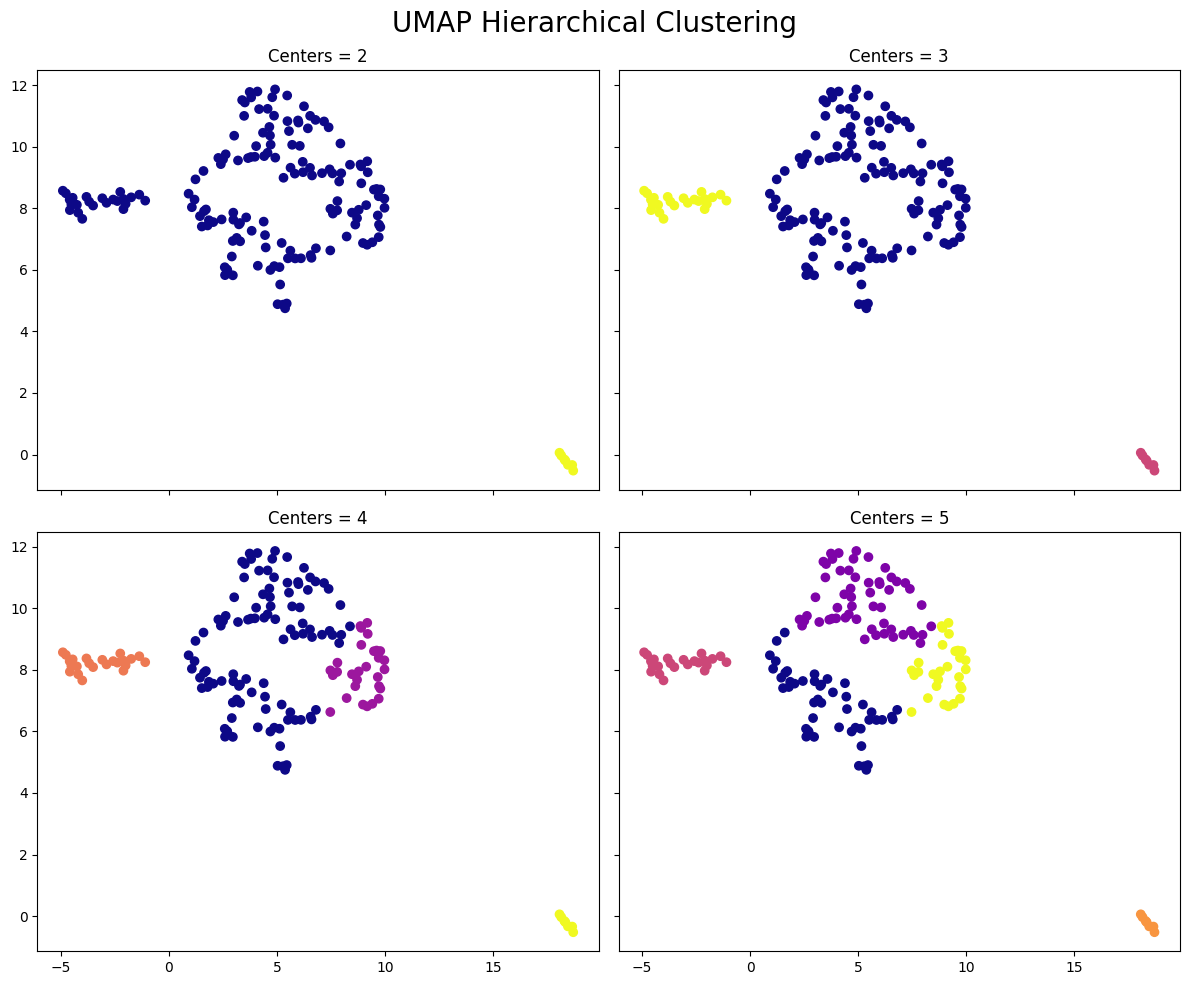

In [ ]:
# Visualize the clusters using the labels from fuzzy clusters, as well as the PCA values
# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('UMAP Hierarchical Clustering', fontsize=20)

# Loop over different numbers of clusters and create scatter plots
for i, ax in enumerate(axes.flatten()):
    num_clusters = num_cluster[i]

    agg = AgglomerativeClustering(n_clusters=num_clusters)
    agg.fit(tsne_results)
    agg_labels = agg.fit_predict(umap_values)

    scatter = ax.scatter(umap_values['UMAP1'], umap_values['UMAP2'], c=agg_labels, cmap=plt.cm.plasma)
    ax.set_title(f'Centers = {num_clusters}')
    ax.label_outer()


plt.tight_layout()
plt.show()

After recieving the best possible  umap scores, I then run it through the best possible hierarcical clustering to see which affinity and linkage works best, using UMAP scores

In [ ]:
np.random.seed=4
Unum_cluster = [2, 3, 4, 5]
U_silhoutte = []
U_harabasz = []
U_davies = []

for i in range(len(Unum_cluster)):
    U_cluster = AgglomerativeClustering(n_clusters=Unum_cluster[i], affinity='euclidean', linkage='average')
    U_cluster_pred = U_cluster.fit_predict(umap_results)

    U_score1 = silhouette_score(umap_results, U_cluster_pred)
    U_score2 = calinski_harabasz_score(umap_results, U_cluster_pred)
    U_score3 = davies_bouldin_score(umap_results, U_cluster_pred)

    U_silhoutte.append(U_score1)
    U_harabasz.append(U_score2)
    U_davies.append(U_score3)  # Fix: Append to U_davies instead of U_harabasz

dict1 = {'num_cluster': Unum_cluster, 'silhoutte_score': U_silhoutte}
dict2 = {'num_cluster': Unum_cluster, 'harabasz_score': U_harabasz}
dict3 = {'num_cluster': Unum_cluster, 'davies_score': U_davies}

U_evsilhoutte_scr = pd.DataFrame(dict1)
U_evharabasz_scr = pd.DataFrame(dict2)
U_evdavies_scr = pd.DataFrame(dict3)

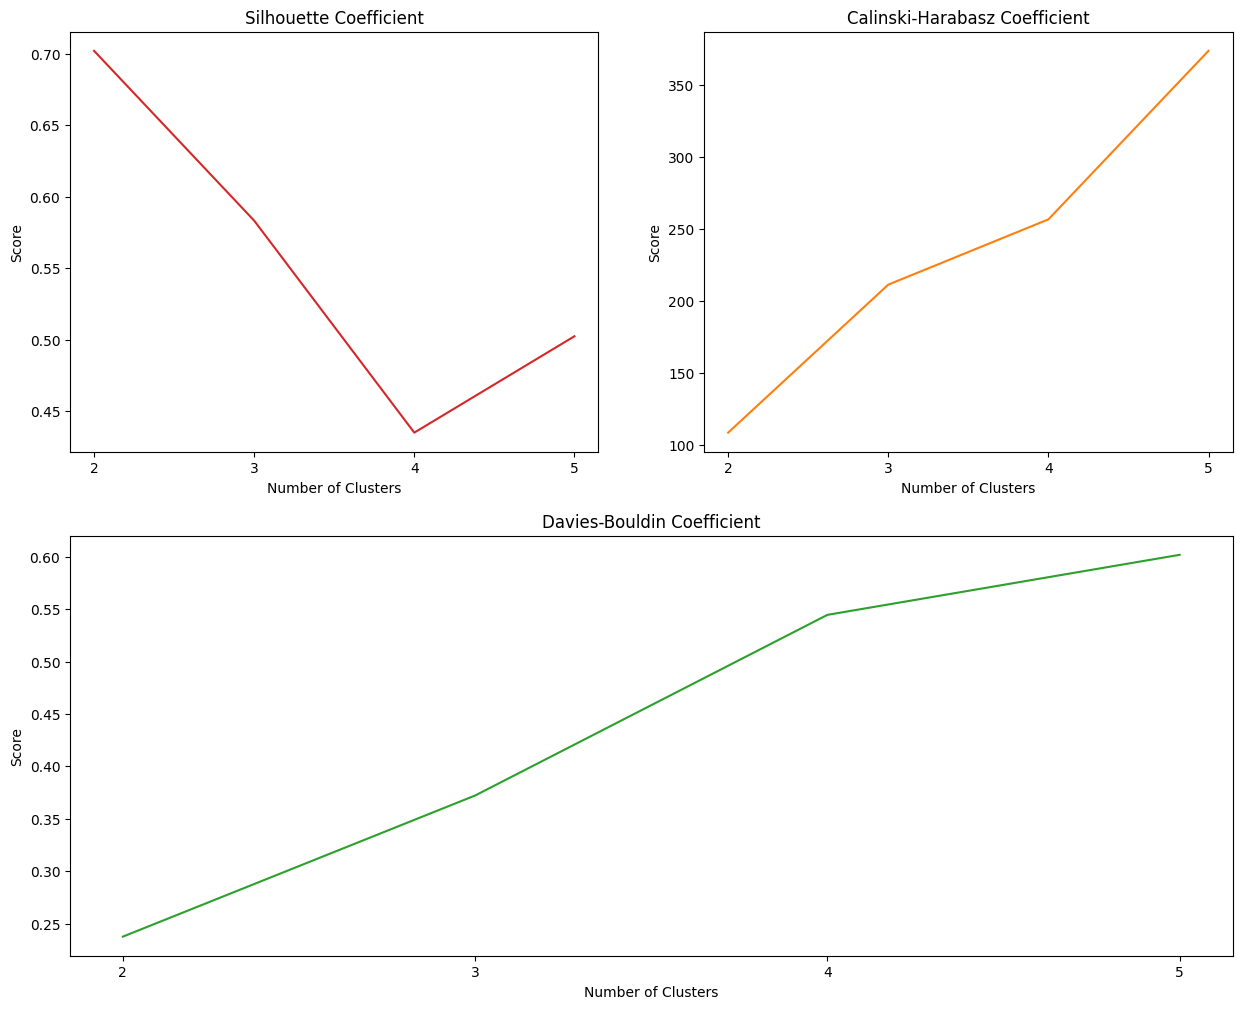

In [ ]:
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(15, 12))
fig.suptitle('Hierarchical UMAP Clustering', fontsize=20)

ax = plt.subplot(gs[0, 0])
plt.plot(Unum_cluster, U_silhoutte, 'tab:red')
plt.title('Silhouette Coefficient', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks([2, 3, 4, 5])

ax = plt.subplot(gs[0, 1])
plt.plot(Unum_cluster, U_harabasz, 'tab:orange')
plt.title('Calinski-Harabasz Coefficient', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks([2, 3, 4, 5])

ax = plt.subplot(gs[1, :])
plt.plot(Unum_cluster, U_davies, 'tab:green')
plt.title('Davies-Bouldin Coefficient', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks([2, 3, 4, 5])

plt.show()

In [ ]:
best_score = -1  # Initialize with a low value
best_params = {}

n_clusters = 3
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['ward', 'complete', 'average']

for linkage in linkages:
    if linkage == 'ward':
        possible_affinities = ['euclidean']
    else:
        possible_affinities = affinities

    for affinity in possible_affinities:
        agg = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
        cluster_labels = agg.fit_predict(umap_results)
        score = silhouette_score(umap_results, cluster_labels)  # Using silhouette score as the measurement metric

        if score > best_score:
            best_score = score
            best_params = {'affinity': affinity, 'linkage': linkage}

print("Best parameters:", best_params)
print("Best silhouette score:", best_score)

Best parameters: {'affinity': 'euclidean', 'linkage': 'ward'}
Best silhouette score: 0.583351


In [ ]:
agg_umap = AgglomerativeClustering(n_clusters = 3,  affinity =best_params['affinity'], linkage = best_params['linkage'])
agg_umap=agg_umap.fit(umap_results)
agg_umap_pred=agg_umap.fit_predict(umap_results)
#initiate the umap model using the Hierarchical clustering

In [ ]:
df_h['cluster_agg']=agg_umap_pred
df_h['agglo_cluster']=agg_umap_pred

In [ ]:
cluster_labels = df_h["cluster_agg"].unique()

color_scale = ['rgb(255, 0, 0)',
               'rgb(31, 119, 180)',
               'rgb(255, 204, 0)',
               ]

scatter_traces = []
for label, color in zip(cluster_labels, color_scale):
    cluster_data = df_h[df_h["cluster_agg"] == label]
    scatter_trace = go.Scatter3d(
        x=cluster_data['child_mort'],
        y=cluster_data['life_expec'],
        z=cluster_data['total_fer'],
        mode='markers',
        name=f'Cluster {label}',
        marker=dict(color=color, size=10, opacity=0.8),
    )
    scatter_traces.append(scatter_trace)

layout = go.Layout(
    title='UMAP Agglomerative Clustering',
    scene=dict(
        xaxis=dict(title='Child Mortality'),
        yaxis=dict(title='Life Expectancy'),
        zaxis=dict(title='Total Fertility')
    ),
    showlegend=True
)

fig = go.Figure(data=scatter_traces, layout=layout)
ply.iplot(fig)

In [ ]:
cluster_labels = df_h["cluster_agg"].unique()

color_scale = ['rgb(255, 0, 0)',
               'rgb(31, 119, 180)',
               'rgb(255, 204, 0)',
               ]

scatter_traces = []
for label, color in zip(cluster_labels, color_scale):
    cluster_data = df_h[df_h["cluster_agg"] == label]
    scatter_trace = go.Scatter3d(
        x=cluster_data['income'],
        y=cluster_data['gdpp'],
        z=cluster_data['life_expec'],
        mode='markers',
        name=f'Cluster {label}',
        marker=dict(color=color, size=10, opacity=0.8),
    )
    scatter_traces.append(scatter_trace)

layout = go.Layout(
    title='UMAP Agglomerative Clustering',
    scene=dict(
        xaxis=dict(title='Income'),
        yaxis=dict(title='Gdpp'),
        zaxis=dict(title='Life Expec')
    ),
    showlegend=True
)

fig = go.Figure(data=scatter_traces, layout=layout)
ply.iplot(fig)

In [ ]:
cluster_labels = df_h["cluster_agg"].unique()

color_scale = ['rgb(255, 0, 0)',
               'rgb(31, 119, 180)',
               'rgb(255, 204, 0)',
               ]

scatter_traces = []
for label, color in zip(cluster_labels, color_scale):
    cluster_data = df_h[df_h["cluster_agg"] == label]
    scatter_trace = go.Scatter3d(
        x=cluster_data['income'],
        y=cluster_data['gdpp'],
        z=cluster_data['child_mort'],
        mode='markers',
        name=f'Cluster {label}',
        marker=dict(color=color, size=10, opacity=0.8),
    )
    scatter_traces.append(scatter_trace)

layout = go.Layout(
    title='UMAP Agglomerative Clustering',
    scene=dict(
        xaxis=dict(title='Income'),
        yaxis=dict(title='Gdpp'),
        zaxis=dict(title='Child Mortality')
    ),
    showlegend=True
)

fig = go.Figure(data=scatter_traces, layout=layout)
ply.iplot(fig)

In [ ]:
df_h['agglo_cluster'] = df_h['agglo_cluster'].replace([1], 'needs_low_financial_assistance')
df_h['agglo_cluster'] = df_h['agglo_cluster'].replace([2], 'needs_medium_financial_assistance')
df_h['agglo_cluster'] = df_h['agglo_cluster'].replace([0], 'needs_high_financial_assistance')

I can visually see that UMAP with hierarchical, has the same mis-labeling as some of the other clusters

In [ ]:
legend_labels = {
    'needs_high_financial_assistance': 'High Assistance',
    'needs_medium_financial_assistance': 'Medium Assistance',
    'needs_low_financial_assistance': 'Low Assistance'
}

fig = px.choropleth(
    df_h[['country', 'agglo_cluster']],
    locations=df_h['country'],
    locationmode='country names',
    color=df_h['agglo_cluster'],
    color_discrete_map={
        'needs_high_financial_assistance': 'red',
        'needs_medium_financial_assistance': 'gold',
        'needs_low_financial_assistance': 'cyan'
    },
    projection='orthographic',
)

fig.update_traces(showlegend=True)

colorbar_title = 'Cluster'
fig.update_layout(
    coloraxis_colorbar=dict(
        title=colorbar_title,
        tickvals=[0, 1, 2],
        ticktext=list(legend_labels.values())
    )
)

fig.show()

In [ ]:
print('Entire process done! Time elapsed: {} seconds'.format(time.time()-time_start))

Entire process done! Time elapsed: 695.0826327800751 seconds


From what I can see from this, the datasets using PCA had a better usage of the clusters, with Fuzzy C-means setting the bar. t-SNE was also effective at working the dataset and assigning clusters appropriately. UMAP however, was considerably worse then the other two dimension reduction techniques. Consistently UMAP gave new clusters when running through the data. In the future, I will prefer PCA and t-SNE